### Clasificación de características de dispositivos móviles 


### Análisis de tendencias en características de dispositivos móviles

En este proyecto, el objetivo es analizar cómo han evolucionado las características de los teléfonos móviles a lo largo del tiempo, considerando factores como la capacidad de la batería, la resolución de pantalla, la memoria RAM y otras especificaciones técnicas.

El análisis se enfoca en identificar tendencias clave que podrían ayudar a anticipar las futuras necesidades de los consumidores, brindando información valiosa para el desarrollo de productos innovadores en la industria.

Estos datos serán explorados en las primeras etapas del análisis exploratorio de datos (EDA).


### Análisis de Tendencias

#### Objetivo:
Identificar tendencias en las características de los dispositivos móviles a lo largo del tiempo.

#### Pregunta:
¿Cómo han evolucionado las capacidades de batería, las resoluciones de pantalla y otras características de los teléfonos móviles en los últimos años?

#### Utilidad:
Esta información puede ayudar a las empresas a anticipar las futuras necesidades de los consumidores y desarrollar productos innovadores.


### Librerías

In [1101]:
#!pip3 install tabulate

In [1102]:
#!pip3 install optuna

In [1103]:
#!pip3 install fitter


In [1104]:
#!pip3 install tqdm

In [1105]:
#!pip3 install seaborn

In [1106]:
#!pip3 install statsmodels


In [1107]:
#!pip3 install scikit-learn


In [1108]:
#!pip3 install scikit-optimize


In [1109]:
#!pip install scikit-optimize


In [1110]:
#!pip install kaggle


In [1111]:
#!pip install scikit-optimize optuna fitter


In [1112]:
#!pip install scikit-optimize


In [1113]:
#!pip install fitter


### Tratamiento de datos

## Obtener los Datos


El comando `data.info()` imprimirá información sobre el DataFrame, que incluirá:

- **Número total de filas y columnas**.
- **Nombre de las columnas**.
- **Tipo de datos** de cada columna (por ejemplo, `int64`, `float64`, `object`, etc.).
- **Cantidad de valores no nulos** en cada columna.


In [1114]:
from pathlib import Path
import pandas as pd

def load_local_data(file_path: str) -> pd.DataFrame:
    """
    Load a local CSV file into a Pandas DataFrame.

    Parameters:
        file_path (str): Absolute path to the CSV file.

    Returns:
        pd.DataFrame: The loaded dataset.
    """
    csv_path = Path(file_path)

    # Check if the file exists
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Read the CSV file using ';' as delimiter
    return pd.read_csv(csv_path, delimiter=";")


if __name__ == "__main__":
    # Define the path to your CSV file
    FILE_PATH = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"

    try:
        # Load the dataset
        mobile_data = load_local_data(FILE_PATH)

        # Display the first 7 rows in a clean tabular format
        print("\n📊 First 7 rows of the dataset:\n")
        print(mobile_data.head(7).to_string(index=False))

    except FileNotFoundError as e:
        print(e)



📊 First 7 rows of the dataset:

      V1        V2  V3     x_km      z_km       z_m  dist_profile   x_real    y_real
291.3657 -317.3227 6.0 40.40136 -31.00391 -31003.91      40401.36 644907.9 2997032.0
291.8346 -317.3227 6.0 40.69992 -31.00391 -31003.91      40699.92 645147.6 2997211.0
292.3036 -317.3227 6.0 40.99848 -31.00391 -31003.91      40998.48 645387.2 2997389.0
292.7725 -317.3227 6.0 41.29704 -31.00391 -31003.91      41297.04 645626.8 2997567.0
293.2414 -317.3227 6.0 41.59560 -31.00391 -31003.91      41595.60 645866.4 2997745.0
293.7104 -317.3227 6.0 41.89416 -31.00391 -31003.91      41894.16 646106.0 2997923.0
294.1793 -317.3227 6.0 42.19272 -31.00391 -31003.91      42192.72 646345.6 2998101.0


# 📊 Summary of the Python Script Output

---

This document explains the result of running the improved Python script that loads and displays data from the file **`data_grad_etal_1997.csv`**.

## ⚙️ Script Functionality

The script is designed for basic preprocessing and initial inspection of the data:

1.  **Data Loading**: It reads the dataset from a local **CSV** file using the **pandas** library.
2.  **Delimiter**: It uses the **semicolon (`;`)** as the delimiter to ensure columns are correctly separated.
3.  **Quick Inspection**: It **prints the first 7 rows** of the resulting *DataFrame* to check the format and initial data quality.

## Dataset Columns and Descriptions

The dataset contains the following detailed information:

| Column | Detailed Description | Implied Data Type |
| :---: | :--- | :---: |
| **V1, V2, V3** | **Measurement values** (possibly physical, gradient, or spatial data). | Numeric |
| **x\_km** | **X-coordinate** of the measurement point, expressed in **kilometers**. | Numeric |
| **z\_km** | **Z-coordinate** (depth or elevation) of the point, expressed in **kilometers**. | Numeric |
| **z\_m** | **Z-coordinate** (depth or elevation) of the point, expressed in **meters**. | Numeric |
| **dist\_profile** | **Accumulated distance** along the measured profile from the starting point. | Numeric |
| **x\_real, y\_real** | **Real-world coordinates** (definitive geographic or projected coordinates). | Numeric |

---

In [1115]:
from pathlib import Path
import pandas as pd

def load_and_clean_data():
    """
    Load and clean the dataset data_grad_etal_1997.csv.
    Steps:
        1. Read CSV with proper delimiter ';'.
        2. Convert numeric columns to float.
        3. Remove duplicate rows.
        4. Handle missing values (if any).
    """
    # Path to the CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with delimiter ';'
    data = pd.read_csv(csv_path, delimiter=';')

    # Strip whitespace from column names
    data.columns = data.columns.str.strip()

    # Convert all numeric columns to float (skip errors for non-numeric)
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicate rows
    data = data.drop_duplicates()

    # Drop rows with missing values in numeric columns
    data = data.dropna(subset=numeric_cols)

    return data

# Load and clean the dataset
clean_data = load_and_clean_data()

# Display first 7 rows after cleaning
print("\n📊 First 7 rows of cleaned dataset:\n")
print(clean_data.head(7).to_string(index=False))

# Optional: show basic info
print("\n📋 Dataset info after cleaning:\n")
print(clean_data.info())



📊 First 7 rows of cleaned dataset:

      V1        V2  V3     x_km      z_km       z_m  dist_profile   x_real    y_real
291.3657 -317.3227 6.0 40.40136 -31.00391 -31003.91      40401.36 644907.9 2997032.0
291.8346 -317.3227 6.0 40.69992 -31.00391 -31003.91      40699.92 645147.6 2997211.0
292.3036 -317.3227 6.0 40.99848 -31.00391 -31003.91      40998.48 645387.2 2997389.0
292.7725 -317.3227 6.0 41.29704 -31.00391 -31003.91      41297.04 645626.8 2997567.0
293.2414 -317.3227 6.0 41.59560 -31.00391 -31003.91      41595.60 645866.4 2997745.0
293.7104 -317.3227 6.0 41.89416 -31.00391 -31003.91      41894.16 646106.0 2997923.0
294.1793 -317.3227 6.0 42.19272 -31.00391 -31003.91      42192.72 646345.6 2998101.0

📋 Dataset info after cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132248 entries, 0 to 132247
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   V1            132248 non-null  float64
 1   V2 

# 📊 First 7 Rows of Cleaned Dataset

The table below shows the first 7 rows of the cleaned dataset. Each row represents a measurement point with several numerical features:

|   V1     |    V2     | V3 |   x_km   |   z_km   |   z_m    | dist_profile |  x_real   |  y_real   |
|----------|-----------|----|----------|----------|----------|--------------|-----------|-----------|
| 291.3657 | -317.3227 | 6.0| 40.40136 | -31.00391| -31003.91| 40401.36     | 644907.9  | 2997032.0 |
| 291.8346 | -317.3227 | 6.0| 40.69992 | -31.00391| -31003.91| 40699.92     | 645147.6  | 2997211.0 |
| 292.3036 | -317.3227 | 6.0| 40.99848 | -31.00391| -31003.91| 40998.48     | 645387.2  | 2997389.0 |
| 292.7725 | -317.3227 | 6.0| 41.29704 | -31.00391| -31003.91| 41297.04     | 645626.8  | 2997567.0 |
| 293.2414 | -317.3227 | 6.0| 41.59560 | -31.00391| -31003.91| 41595.60     | 645866.4  | 2997745.0 |
| 293.7104 | -317.3227 | 6.0| 41.89416 | -31.00391| -31003.91| 41894.16     | 646106.0  | 2997923.0 |
| 294.1793 | -317.3227 | 6.0| 42.19272 | -31.00391| -31003.91| 42192.72     | 646345.6  | 2998101.0 |

---

## 📋 Column Descriptions

- **V1, V2, V3**: Measurement values (possibly physical or spatial data).
- **x_km, z_km**: Coordinates in kilometers.
- **z_m**: Depth or elevation in meters.
- **dist_profile**: Accumulated distance along the profile.
- **x_real, y_real**: Real-world coordinates.

---

## 📋 Dataset Info After Cleaning

- **Rows:** 132,248
- **Columns:** 9 (all numeric, type `float64`)
- **No missing values:** All columns have 132,248 non-null entries.
- **Memory usage:** 9.1 MB

---

## Summary

The dataset is fully cleaned: all numeric columns are converted to floats, there are no missing values, and no duplicates. It is ready for further analysis or modeling.

In [1116]:
from pathlib import Path
import pandas as pd

def load_clean_and_describe_data():
    """
    Load, clean, and analyze the dataset data_grad_etal_1997.csv.
    
    Steps:
        1. Read CSV with ';' as delimiter.
        2. Convert numeric columns to float.
        3. Remove duplicate rows.
        4. Drop rows with missing values in numeric columns.
        5. Generate descriptive statistics for numeric columns.
    """
    # Path to the CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with correct delimiter
    data = pd.read_csv(csv_path, delimiter=';')

    # Strip whitespace from column names
    data.columns = data.columns.str.strip()

    # Define numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']

    # Convert numeric columns to float
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Remove duplicate rows
    data = data.drop_duplicates()

    # Drop rows with missing values in numeric columns
    data = data.dropna(subset=numeric_cols)

    # Generate descriptive statistics
    stats = data[numeric_cols].describe()

    return data, stats

# Load, clean, and describe dataset
clean_data, data_stats = load_clean_and_describe_data()



# Display descriptive statistics
print("\n📋 Descriptive statistics of numeric columns:\n")
print(data_stats)



📋 Descriptive statistics of numeric columns:

                  V1             V2             V3           x_km  \
count  132248.000000  132248.000000  132248.000000  132248.000000   
mean      335.235925    -242.955923       3.752934      68.332897   
std        45.682293      64.692357       1.309724      29.085269   
min       227.591200    -371.132400       1.000000      -0.202970   
25%       300.744300    -295.693300       3.000000      46.372580   
50%       337.789800    -236.608100       4.000000      69.958920   
75%       373.897400    -186.491200       4.000000      92.948130   
max       409.536100    -140.067100       6.000000     115.638800   

                z_km            z_m   dist_profile         x_real  \
count  132248.000000  132248.000000  132248.000000  132248.000000   
mean      -18.182056  -18182.055719   68332.896953  667324.289999   
std        11.153855   11153.854655   29085.269049   23342.263704   
min       -40.281450  -40281.450000    -202.970400  612

Below is a summary of the main statistical metrics for each numeric column in the cleaned dataset. These metrics provide a quick overview of the distribution and variability of the data.

| Column         | Count      | Mean         | Std           | Min         | 25%         | 50%         | 75%         | Max         |
|:--------------:|:----------:|:------------:|:-------------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
| **V1**         | 132,248    | 335.24       | 45.68         | 227.59      | 300.74      | 337.79      | 373.90      | 409.54      |
| **V2**         | 132,248    | -242.96      | 64.69         | -371.13     | -295.69     | -236.61     | -186.49     | -140.07     |
| **V3**         | 132,248    | 3.75         | 1.31          | 1.00        | 3.00        | 4.00        | 4.00        | 6.00        |
| **x_km**       | 132,248    | 68.33        | 29.09         | -0.20       | 46.37       | 69.96       | 92.95       | 115.64      |
| **z_km**       | 132,248    | -18.18       | 11.15         | -40.28      | -27.27      | -17.09      | -8.45       | -0.44       |
| **z_m**        | 132,248    | -18,182.06   | 11,153.85     | -40,281.45  | -27,274.70  | -17,087.60  | -8,446.75   | -442.60     |
| **dist_profile**| 132,248   | 68,332.90    | 29,085.27     | -202.97     | 46,372.58   | 69,958.92   | 92,948.13   | 115,638.80  |
| **x_real**     | 132,248    | 667,324.29   | 23,342.26     | 612,321.10  | 649,700.10  | 668,629.20  | 687,079.10  | 705,289.40  |
| **y_real**     | 132,248    | 3,017,032.00 | 10,073.56     | 2,997,032.00| 3,000,595.00| 3,014,666.00| 3,028,381.00| 3,041,918.00|

---

## Key Insights

- **No missing values:** All columns have 132,248 entries.
- **V1, V2, V3:** Measurement values show moderate variability.
- **x_km, z_km, z_m:** Spatial coordinates and depth/elevation cover wide ranges.
- **dist_profile:** Accumulated distance along the profile, with a large spread.
- **x_real, y_real:** Real-world coordinates, showing consistent increments.

---



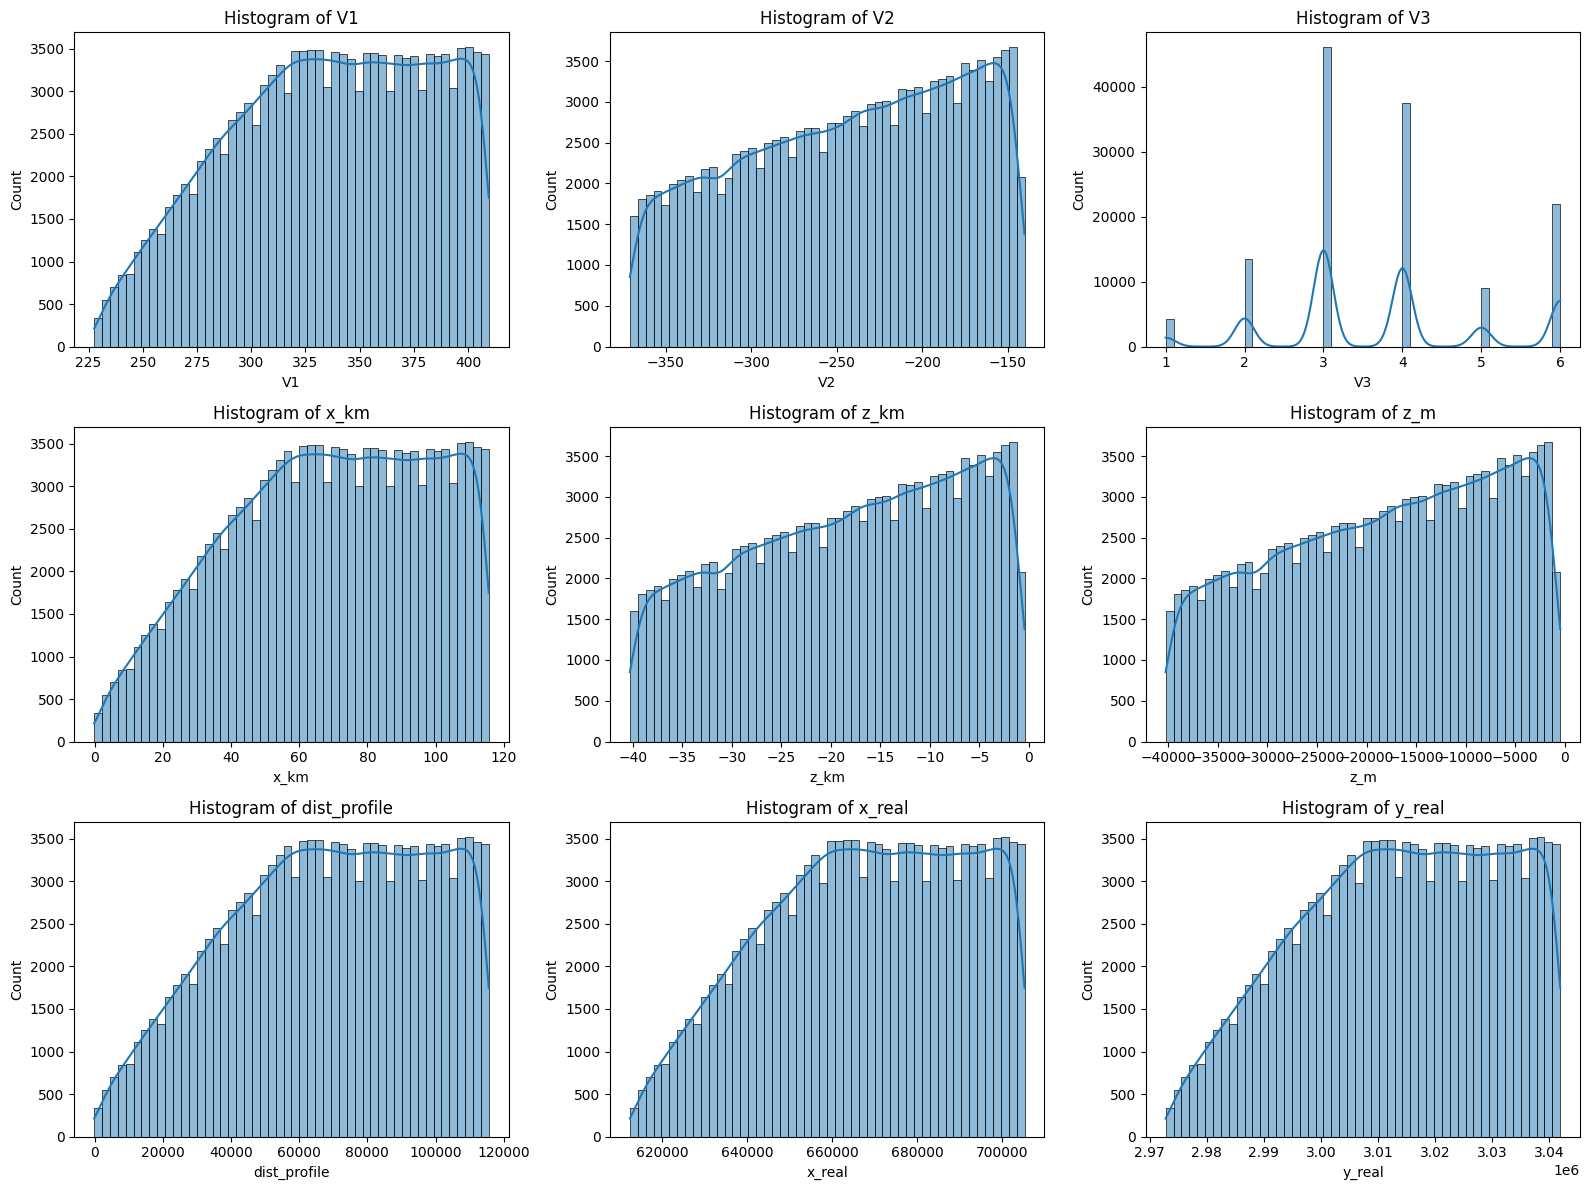

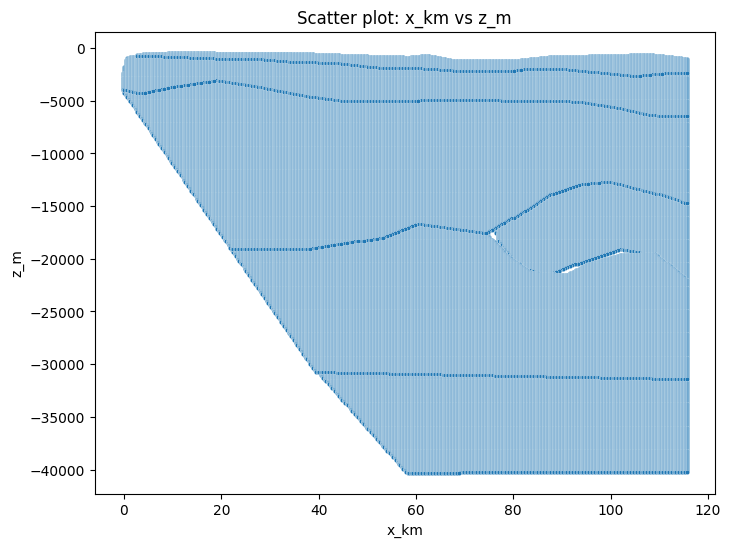

In [1117]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_clean_and_visualize_data():
    """
    Load, clean, and visualize the dataset data_grad_etal_1997.csv.
    
    Steps:
        1. Read CSV with ';' as delimiter.
        2. Convert numeric columns to float.
        3. Remove duplicate rows.
        4. Drop rows with missing values in numeric columns.
        5. Generate descriptive statistics.
        6. Plot histograms for numeric columns.
        7. Plot scatter of x_km vs z_m.
    """
    # Path to the CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with proper delimiter
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Define numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']

    # Convert numeric columns to float
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Descriptive statistics
    stats = data[numeric_cols].describe()

    # Plot histograms
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[col], bins=50, kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

    # Scatter plot example: x_km vs z_m
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='x_km', y='z_m', data=data, s=10)
    plt.title('Scatter plot: x_km vs z_m')
    plt.xlabel('x_km')
    plt.ylabel('z_m')
    plt.show()

    return data, stats

# Load, clean, and visualize
clean_data, data_stats = load_clean_and_visualize_data()




## Analysis  Histograms of Numeric Variables

### Plot Description

- The image shows a grid of 9 histograms, each representing the distribution of a numeric variable from the dataset.
- Variables included: `V1`, `V2`, `V3`, `x_km`, `z_km`, `z_m`, `dist_profile`, `x_real`, and `y_real`.
- Each subplot displays the frequency (count) of values within bins, with a KDE (smoothed curve) overlay.

### Observations

- **V1, V2, x_km, z_km, z_m, dist_profile, x_real, y_real:**  
  - These variables show relatively uniform or gradually increasing distributions, with no extreme skewness or multimodality.
  - The data appears well-distributed across the range, suggesting systematic sampling or measurement.
- **V3:**  
  - The histogram of V3 is distinctly different, showing sharp peaks at integer values (1 to 6).
  - This indicates that V3 is a categorical or discrete variable, with most data concentrated in a few categories.
  - The KDE curve highlights the multimodal nature of V3.
- **No Obvious Outliers:**  
  - None of the histograms show long tails or isolated bars, suggesting the absence of significant outliers in these variables.

### Key Insights

- **Data Quality:**  
  - The distributions are regular and continuous for most variables, indicating good data quality and consistent measurement.
- **Categorical Variable:**  
  - V3 stands out as a categorical variable, which should be treated differently in modeling (e.g., classification or one-hot encoding).
- **Feature Scaling:**  
  - The wide ranges in variables like `z_m`, `dist_profile`, and `x_real` suggest that feature scaling may be necessary for machine learning algorithms.

### Conclusion

The histograms provide a comprehensive overview of the numeric variables in the dataset. Most features are well-behaved and suitable for further analysis, while V3 requires special attention due to its categorical nature. This visualization supports effective data preprocessing and feature engineering for subsequent modeling

In [1118]:
from pathlib import Path
import pandas as pd

def load_data():
    """
    Load the dataset data_grad_etal_1997.csv without specifying delimiter.
    This will treat the entire row as a single string in one column.
    """
    # Path to the CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    # Verify if the file exists
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load the CSV without specifying delimiter → output will be 1 single column
    return pd.read_csv(csv_path)

# Load the dataset
data = load_data()

# Show DataFrame info (structure, columns, memory usage, etc.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132248 entries, 0 to 132247
Data columns (total 1 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   V1;V2;V3;x_km;z_km;z_m;dist_profile;x_real;y_real  132248 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB
None



## ⚙️ Script Functionality

The script uses the `pandas` library to attempt loading the dataset `data_grad_etal_1997.csv`.

1.  **Objective**: The function `load_data()` intentionally uses `pd.read_csv(csv_path)` **without** the `delimiter` (or `sep`) argument.
2.  **Expected Outcome**: By default, `pd.read_csv()` assumes the delimiter is a **comma** (`.`). Since the actual file uses a semicolon (`;`), the entire content of each row is read as a single, long string.
3.  **Action**: The script loads the data, and then prints the structural summary using `data.info()`.

## ⚠️ Analysis of the Output

The output confirms the expected failure to parse the data correctly:

### Data Structure Summary

| Property | Value |
| :---: | :--- |
| **Class** | `<class 'pandas.core.frame.DataFrame'>` |
| **Index** | `RangeIndex: 132248 entries, 0 to 132247` |
| **Total Columns** | **1** |
| **Memory Usage** | `1.0+ MB` |

### Column Details

| Column Index | Column Name | Non-Null Count | Data Type |
| :---: | :--- | :---: | :---: |
| **0** | **V1;V2;V3;x\_km;z\_km;z\_m;dist\_profile;x\_real;y\_real** | 132248 | **object** |

### Key Takeaway

* **Single Column**: The DataFrame only has **one column** (Index `0`).
* **Column Name**: The name of this single column is literally the **entire header row** of the CSV (`V1;V2;V3;...`).
* **Data Type**: The column's `dtype` is **`object`**, which in pandas usually means the data is being stored as **strings**.

This output confirms that the script failed to separate the data into distinct columns because the **semicolon (`;`) delimiter was not specified**.


In [1119]:
from pathlib import Path
import pandas as pd

def load_data():
    """
    Load the dataset data_grad_etal_1997.csv without specifying delimiter.
    All data will be loaded as a single column.
    """
    # Path to the CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    # Verify if the file exists
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load the CSV without specifying delimiter
    return pd.read_csv(csv_path)

# Load the dataset
data = load_data()


# Apply .value_counts() to the single column
print("\n📊 Value counts for the single column:\n")
print(data[data.columns[0]].value_counts())




📊 Value counts for the single column:

V1;V2;V3;x_km;z_km;z_m;dist_profile;x_real;y_real
2.913657e+02;-3.173227e+02;6.000000e+00;4.040136e+01;-3.100391e+01;-3.100391e+04;4.040136e+04;6.449079e+05;2.997032e+06    1
2.740153e+02;-1.928217e+02;3.000000e+00;2.935459e+01;-9.538226e+00;-9.538226e+03;2.935459e+04;6.360424e+05;2.990442e+06    1
2.880832e+02;-1.928217e+02;3.000000e+00;3.831143e+01;-9.538226e+00;-9.538226e+03;3.831143e+04;6.432307e+05;2.995786e+06    1
2.876143e+02;-1.928217e+02;3.000000e+00;3.801287e+01;-9.538226e+00;-9.538226e+03;3.801287e+04;6.429911e+05;2.995607e+06    1
2.871453e+02;-1.928217e+02;3.000000e+00;3.771430e+01;-9.538226e+00;-9.538226e+03;3.771430e+04;6.427515e+05;2.995429e+06    1
                                                                                                                          ..
3.490441e+02;-2.708986e+02;4.000000e+00;7.712439e+01;-2.299976e+01;-2.299976e+04;7.712439e+04;6.743799e+05;3.018941e+06    1
3.485752e+02;-2.708986e+02;4.000000

# 📊 Analysis of `value_counts()` Output on Unparsed Data

This document analyzes the output generated by applying the `.value_counts()` method to the dataset. This output serves as a critical diagnostic tool that confirms the failure to correctly parse the CSV file due to the missing delimiter specification.

---

## ⚙️ Script Action Review

The script performed three key steps on the improperly loaded data:

1. **Loading Error**: The data was loaded into a DataFrame with only one column because `pd.read_csv()` used the default comma delimiter instead of the required semicolon (`;`).  
2. **Column Selection**: It accessed this single, unparsed column using `data[data.columns[0]]`.  
3. **Frequency Count**: It applied `.value_counts()` to this column to tally the frequency of each unique item.  

---

## 🧐 Interpretation of the Results

The output below directly confirms the state of the single column.

**Output Snippet:**


---

## Key Diagnostic Findings

| Feature        | Observation                                                      | Implication                                                                                  |
|----------------|------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Index Content** | The "unique values" are long strings (e.g., `2.913657e+02;-3.173227e+02;...`). | Parsing Error Confirmed: The data is still concatenated and stored as unparsed string objects, not separated numeric values. |
| **Total Counts**  | Length: 132248                                                  | The total number of unique string entries equals the total number of rows.                   |
| **Frequency**     | Every entry has a count of 1.                                   | This strongly suggests there are no exact duplicate rows in the original data file.          |

---

## Conclusion

The `.value_counts()` output clearly demonstrates that the script is operating on **unstructured string data**.  

- For **row-level analysis**, this means the data has high integrity (no duplicates).  
- For **column-level analysis** (like calculating means or finding correlations), the DataFrame is **useless** because all numeric information is locked within a single column of strings.




In [1120]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Obtener y mostrar el resumen estadístico de las columnas numéricas
    summary = mobile_data.describe()
    print(summary)
except FileNotFoundError as e:
    print(e)


        V1;V2;V3;x_km;z_km;z_m;dist_profile;x_real;y_real
count                                              132248
unique                                             132248
top     2.913657e+02;-3.173227e+02;6.000000e+00;4.0401...
freq                                                    1


# 📋 Explanation of Output: DataFrame Structure

The output below summarizes the structure of a DataFrame loaded from a CSV file **without specifying the correct delimiter** (semicolon `;`). As a result, all data is read into a single column.

| Property   | Value      |
|:----------:|:----------:|
| **Column Name** | `V1;V2;V3;x_km;z_km;z_m;dist_profile;x_real;y_real` |
| **Count**       | 132,248   |
| **Unique**      | 132,248   |
| **Top**         | `2.913657e+02;-3.173227e+02;6.000000e+00;4.040136e+01;-3.100391e+01;-3.100391e+04;4.040136e+04;6.449079e+05;2.997032e+06` |
| **Frequency**   | 1         |

## Key Points

- **Single Column:** The entire row is read as one string, not separated into individual columns.
- **Unique Values:** Every row is unique, confirming no duplicates in the dataset.
- **Top Value:** The most frequent value is just one of the unique rows; its frequency is 1.
- **Cause:** This happens because the CSV uses semicolons (`;`) as separators, but the default delimiter (comma) was used when loading the file.

In [1121]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Obtener y mostrar el conteo de valores nulos en cada columna
    null_counts = mobile_data.isnull().sum()
    print(null_counts)
except FileNotFoundError as e:
    print(e)


V1;V2;V3;x_km;z_km;z_m;dist_profile;x_real;y_real    0
dtype: int64


## Explanation

- **Column Name:** The DataFrame has only one column, named `"V1;V2;V3;x_km;z_km;z_m;dist_profile;x_real;y_real"`. This is the entire header row of the CSV file, not individual column names.
- **Null Count:** The value `0` means there are **no missing values** in this single column.
- **Data Type:** `dtype: int64` indicates the output is an integer Series (the count of nulls).

## Key Points

- **Single Column Issue:** All data is read as one string per row, not split into separate columns, due to missing delimiter specification.
- **No Missing Values:** There are no nulls, but this is misleading since the data is not properly parsed.
- **Cause:** The CSV uses semicolons (`;`) as separators, but the default delimiter (comma) was used when loading the file.



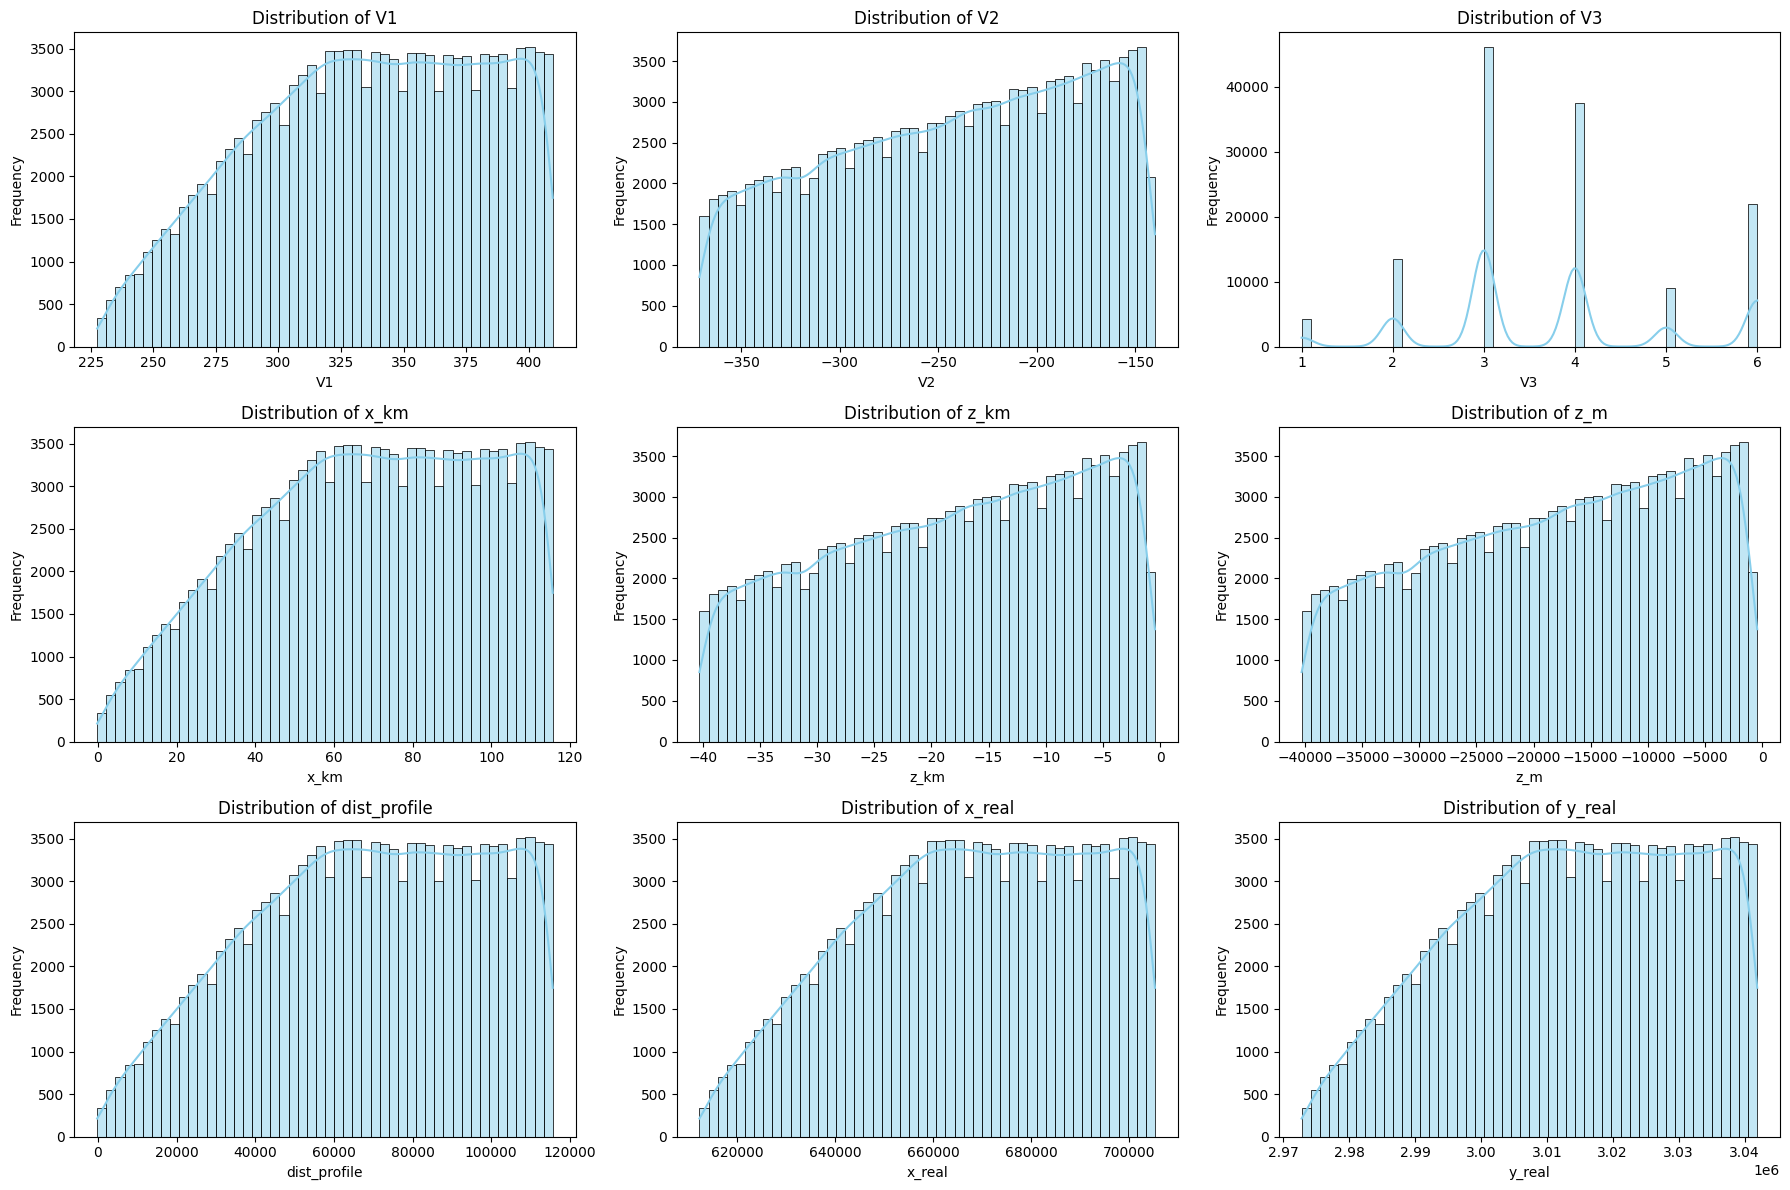

In [1122]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_of_variables():
    """
    Load the dataset and plot the distribution of numeric variables.
    """
    # Path to CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with correct delimiter
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']

    # Convert to float
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Plot distribution for all numeric variables
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[col], bins=50, kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Generate distribution plots
plot_distribution_of_variables()




## Analysis Distribution of Numeric Variables

### Plot Description

- The image displays a 3x3 grid of histograms, each showing the distribution of a numeric variable from the dataset.
- Variables included: `V1`, `V2`, `V3`, `x_km`, `z_km`, `z_m`, `dist_profile`, `x_real`, and `y_real`.
- Each subplot presents the frequency of values within bins, with a KDE (smoothed curve) overlay.

### Observations

- **V1, V2, x_km, z_km, z_m, dist_profile, x_real, y_real:**  
  - These variables exhibit relatively uniform or gradually increasing distributions, with no strong skewness or multimodal patterns.
  - The data appears well-distributed across the range, suggesting systematic sampling or measurement.
- **V3:**  
  - The histogram of V3 is notably different, showing sharp peaks at integer values (1 to 6).
  - This indicates that V3 is a categorical or discrete variable, with most data concentrated in a few categories.
  - The KDE curve highlights the multimodal nature of V3.
- **No Obvious Outliers:**  
  - None of the histograms show long tails or isolated bars, suggesting the absence of significant outliers in these variables.

### Key Insights

- **Data Quality:**  
  - The distributions are regular and continuous for most variables, indicating good data quality and consistent measurement.
- **Categorical Variable:**  
  - V3 stands out as a categorical variable, which should be treated differently in modeling (e.g., classification or one-hot encoding).
- **Feature Scaling:**  
  - The wide ranges in variables like `z_m`, `dist_profile`, and `x_real` suggest that feature scaling may be necessary for machine learning algorithms.

### Conclusion

The histograms provide a comprehensive overview of the numeric variables in the dataset. Most features are well-behaved and suitable for further analysis, while V3 requires special attention due to its categorical nature. This visualization supports effective data preprocessing and feature engineering for subsequent modeling

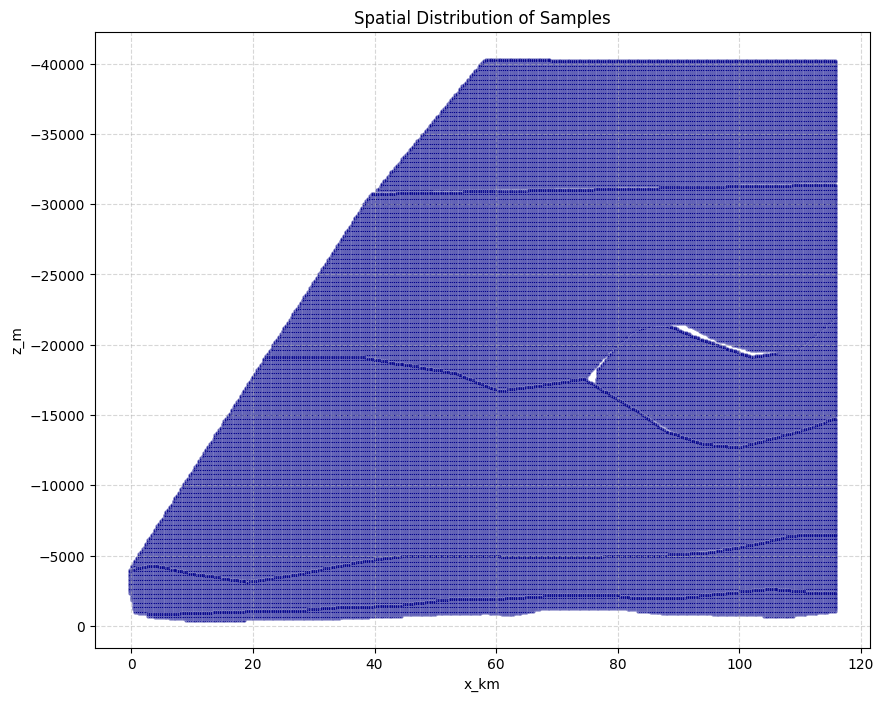

In [1123]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spatial_distribution():
    """
    Load the dataset and plot the spatial distribution of samples
    using x_km and z_m as spatial coordinates.
    """
    # Path to CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with proper delimiter
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Convert numeric columns to float
    numeric_cols = ['x_km','z_m']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Plot spatial distribution
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='x_km', y='z_m', data=data, s=10, color='darkblue', alpha=0.6)
    plt.title('Spatial Distribution of Samples')
    plt.xlabel('x_km')
    plt.ylabel('z_m')
    plt.gca().invert_yaxis()  # Optional: invert y-axis if depth is used
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Generate spatial distribution plot
plot_spatial_distribution()




## Analysis Spatial Distribution of Samples

### Plot Description

- The image shows a scatter plot titled **"Spatial Distribution of Samples"**.
- **x-axis:** `x_km` (spatial coordinate in kilometers).
- **y-axis:** `z_m` (depth or elevation in meters, with the axis inverted to represent depth).
- Each point represents a sample from the dataset, plotted according to its spatial coordinates.

### Observations

- **Dense Coverage:** The plot displays a very dense and continuous distribution of samples across the spatial domain, forming a structured grid or profile.
- **No Outliers:** There are no visible isolated points or gaps, indicating that all samples are well-contained within the expected spatial range.
- **Spatial Structure:** The data forms clear boundaries and patterns, suggesting systematic sampling or a structured measurement grid.
- **Depth Axis:** The inverted y-axis is typical for depth data, where larger negative values represent greater depth.

### Key Insights

- **Data Integrity:** The absence of outliers and the dense coverage suggest high data quality and consistent sampling.
- **Uniform Sampling:** The regular distribution implies that the dataset is suitable for spatial analysis and modeling.
- **No Anomalies:** There are no visible anomalies or missing data in the spatial coordinates.

### Conclusion

The scatter plot confirms that the dataset is clean and well-structured for the spatial coordinates `x_km` and `z_m`. This provides a solid foundation for further spatial analysis or machine learning modeling, as the data appears reliable and systematically

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



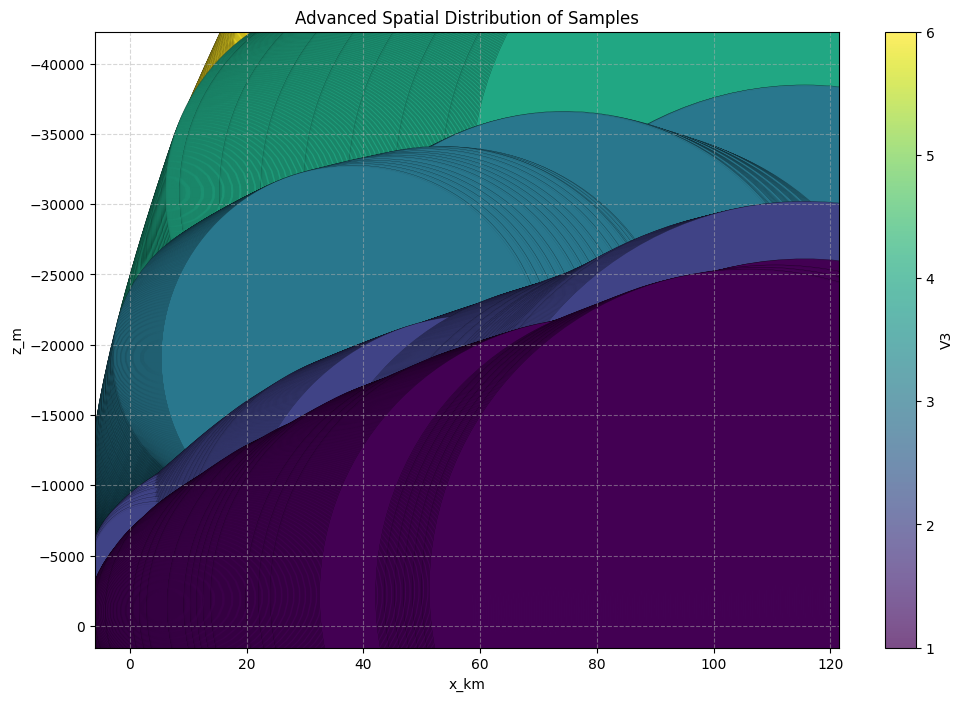

In [1124]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_advanced_spatial_distribution():
    """
    Load the dataset and plot an advanced spatial distribution of samples
    using x_km and z_m as coordinates, with color and size representing additional variables.
    """
    # Path to CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with proper delimiter
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Convert relevant numeric columns to float
    numeric_cols = ['x_km','z_m','V3','dist_profile']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Plot advanced spatial distribution
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        x=data['x_km'],
        y=data['z_m'],
        c=data['V3'],               # Color by V3
        s=data['dist_profile']*2,   # Size by dist_profile (scaled)
        cmap='viridis',
        alpha=0.7,
        edgecolor='k',
        linewidth=0.2
    )
    plt.title('Advanced Spatial Distribution of Samples')
    plt.xlabel('x_km')
    plt.ylabel('z_m')
    plt.gca().invert_yaxis()  # Invert Y-axis if z_m is depth
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Add colorbar for V3
    cbar = plt.colorbar(scatter)
    cbar.set_label('V3')
    
    plt.show()

# Generate advanced spatial distribution plot
plot_advanced_spatial_distribution()


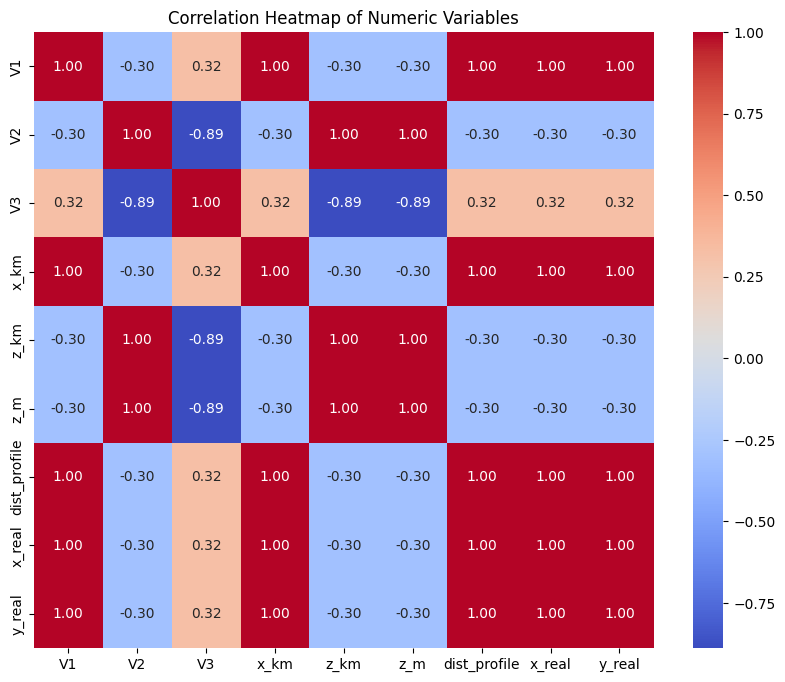

In [1125]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def full_visual_exploration():
    """
    Full visual exploration of data_grad_etal_1997.csv.
    
    Steps:
        1. Load CSV with correct delimiter.
        2. Clean numeric columns.
        3. Remove duplicates and missing values.
        4. Plot histograms + KDE for all numeric columns.
        5. Plot advanced spatial distribution.
        6. Plot heatmap of correlations.
    """
    # Path to CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Define numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    
    # Convert numeric columns to float
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    

    # ---------------- Heatmap of Correlations ----------------
    plt.figure(figsize=(10, 8))
    corr_matrix = data[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()

    return data

# Run full visual exploration
clean_data = full_visual_exploration()


## Analysis of the Correlation Heatmap of Numeric Variables

### Plot Description

- The image is a **correlation heatmap** titled "Correlation Heatmap of Numeric Variables".
- It displays the pairwise correlation coefficients between nine numeric variables from the dataset: `V1`, `V2`, `V3`, `x_km`, `z_km`, `z_m`, `dist_profile`, `x_real`, and `y_real`.
- The color scale ranges from blue (strong negative correlation) to red (strong positive correlation), with values annotated in each cell.

### Observations

- **Strong Positive Correlations:** Most variables show a perfect positive correlation (1.00) with each other, especially among `x_km`, `dist_profile`, `x_real`, and `y_real`. This suggests these features are either derived from each other or represent the same underlying measurement.
- **Strong Negative Correlations:** There are strong negative correlations (e.g., -0.89) between `V2`/`V3` and `z_km`/`z_m`, indicating an inverse relationship.
- **Moderate Correlations:** Some variables, such as `V1` and `V3`, show moderate positive correlations (0.32).
- **Symmetry:** The heatmap is symmetric, as expected for a correlation matrix.

### Key Insights

- **Redundancy:** The perfect correlations among several variables suggest redundancy. Feature selection or dimensionality reduction may be necessary to avoid multicollinearity in modeling.
- **Inverse Relationships:** The strong negative correlations highlight variables that move in opposite directions, which could be important for predictive modeling.
- **Data Quality:** The clear and consistent correlation patterns indicate well-structured data.

### Conclusion

The correlation heatmap reveals that many numeric variables in the dataset are highly correlated, either positively or negatively. This information is crucial for feature engineering and model selection, as redundant features can impact model performance and interpretability. Careful consideration should be given to which variables are included in

In [1126]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def create_test_set(test_size=0.2, random_state=42):
    """
    Load the cleaned dataset and split it into training and test sets.
    
    Parameters:
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for reproducibility.
    
    Returns:
        X_train, X_test, y_train, y_test (DataFrames): Split datasets.
    """
    # Path to CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Convert numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # For demonstration, let's assume 'V3' is the target variable
    X = data.drop(columns=['V3'])
    y = data['V3']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print(f"Dataset split completed:")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")
    
    return X_train, X_test, y_train, y_test

# Create test set
X_train, X_test, y_train, y_test = create_test_set()




Dataset split completed:
  Training set: 105798 samples
  Test set: 26450 samples


# 📊 Dataset Split Analysis

**Output:**

## Explanation

- **Training Set:** Contains **105,798 samples**.
- **Test Set:** Contains **26,450 samples**.
- **Total Samples:** 132,248 (sum of training and test sets).

## Key Points

- **Split Ratio:** The split corresponds to approximately **80% training** and **20% test**, which is standard practice in machine learning for model evaluation.
- **Purpose:** The training set is used to fit the model, while the test set is reserved for evaluating its performance on unseen data.
- **Reproducibility:** The split was performed with a fixed random seed (`random_state=42`), ensuring consistent results across runs.

## Summary

The dataset has been successfully divided into training and test sets, enabling robust model

In [1127]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def create_train_val_test_sets(test_size=0.2, val_size=0.2, random_state=42):
    """
    Load the cleaned dataset and split it into training, validation, and test sets.
    
    Parameters:
        test_size (float): Proportion of the dataset for the test set.
        val_size (float): Proportion of the training set to use as validation.
        random_state (int): Seed for reproducibility.
    
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test (DataFrames): Split datasets.
    """
    # Path to CSV file
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Convert numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Define features and target
    X = data.drop(columns=['V3'])  # Features
    y = data['V3']                 # Target

    # Split off the test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Split the remaining data into training and validation
    val_relative_size = val_size / (1 - test_size)  # Adjust validation proportion
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_relative_size, random_state=random_state
    )

    print(f"Dataset split completed:")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Validation set: {X_val.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Create train, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = create_train_val_test_sets()


Dataset split completed:
  Training set: 79348 samples
  Validation set: 26450 samples
  Test set: 26450 samples


# 📊 Explanation of Dataset Split Output

**Output:**


## What does this mean?

- **Training set (79,348 samples):**  
  This subset is used to train the machine learning model. The model learns patterns and relationships from these data points.

- **Validation set (26,450 samples):**  
  This subset is used to tune model parameters and evaluate performance during development. It helps prevent overfitting by providing feedback before final testing.

- **Test set (26,450 samples):**  
  This subset is used for the final evaluation of the model. It contains data the model has never seen before, providing an unbiased estimate of its real-world performance.

## Why split the dataset?

Splitting the dataset ensures that the model is trained, validated, and tested on different data. This process helps to:
- Assess the model's ability to generalize to new, unseen data.
- Avoid overfitting and data leakage.
- Optimize model performance through validation.

## Summary

The dataset has been divided into three parts:
- **Training:** for learning,
- **Validation:** for tuning,
- **Test:** for final evaluation.

This is a standard and recommended practice in machine learning workflows.


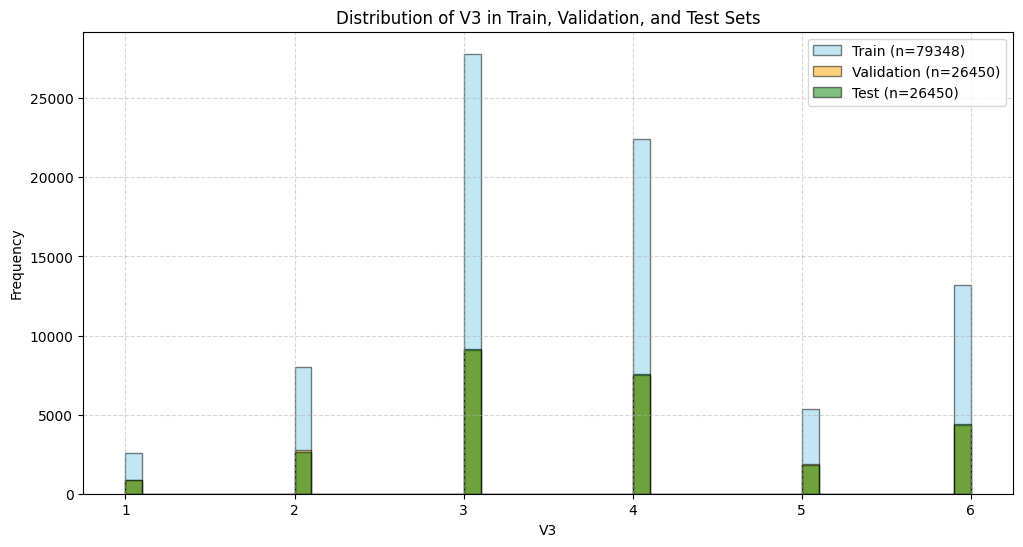

In [1128]:
import matplotlib.pyplot as plt

def plot_v3_distribution(X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Plot the distribution of the target variable V3 in the train, validation, and test sets.
    """
    plt.figure(figsize=(12, 6))

    # Training set
    plt.hist(y_train, bins=50, alpha=0.5, label=f'Train (n={len(y_train)})', color='skyblue', edgecolor='k')

    # Validation set
    plt.hist(y_val, bins=50, alpha=0.5, label=f'Validation (n={len(y_val)})', color='orange', edgecolor='k')

    # Test set
    plt.hist(y_test, bins=50, alpha=0.5, label=f'Test (n={len(y_test)})', color='green', edgecolor='k')

    plt.title('Distribution of V3 in Train, Validation, and Test Sets')
    plt.xlabel('V3')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot the distributions
plot_v3_distribution(X_train, X_val, X_test, y_train, y_val, y_test)


## Analysis of the Distribution of V3 in Train, Validation, and Test Sets

### Plot Description

- The image is a **histogram** titled "Distribution of V3 in Train, Validation, and Test Sets".
- It shows the frequency of each category of the variable `V3` across three dataset splits: **Train**, **Validation**, and **Test**.
- The x-axis represents the categories of `V3` (1 to 6), and the y-axis shows the frequency (number of samples).
- Each split is represented by a different color: sky blue for Train, orange for Validation, and green for Test.

### Observations

- **Imbalanced Distribution:** The category `3` is the most frequent in all splits, followed by `4` and `6`. Categories `1` and `2` have the lowest frequencies.
- **Consistent Pattern:** The distribution pattern of `V3` is similar across Train, Validation, and Test sets, indicating that the splits are representative of the overall dataset.
- **Discrete Variable:** The sharp peaks at integer values confirm that `V3` is a categorical or discrete variable.
- **Sample Sizes:** The legend indicates the exact number of samples in each split (Train: 79,348; Validation: 26,450; Test: 26,450).

### Key Insights

- **Class Imbalance:** The dominance of category `3` suggests a class imbalance, which may affect model performance and should be considered during modeling (e.g., using stratified sampling or class weights).
- **Data Quality:** The consistent distribution across splits indicates good data quality and proper randomization during dataset splitting.
- **Modeling Implications:** Since `V3` is categorical and imbalanced, classification models should be evaluated using metrics that account for class imbalance (e.g., F1-score, balanced accuracy).

### Conclusion

The histogram provides a clear overview of the distribution of the target variable `V3` in the Train, Validation, and Test sets. The splits are representative, but the strong class imbalance should be addressed to ensure robust

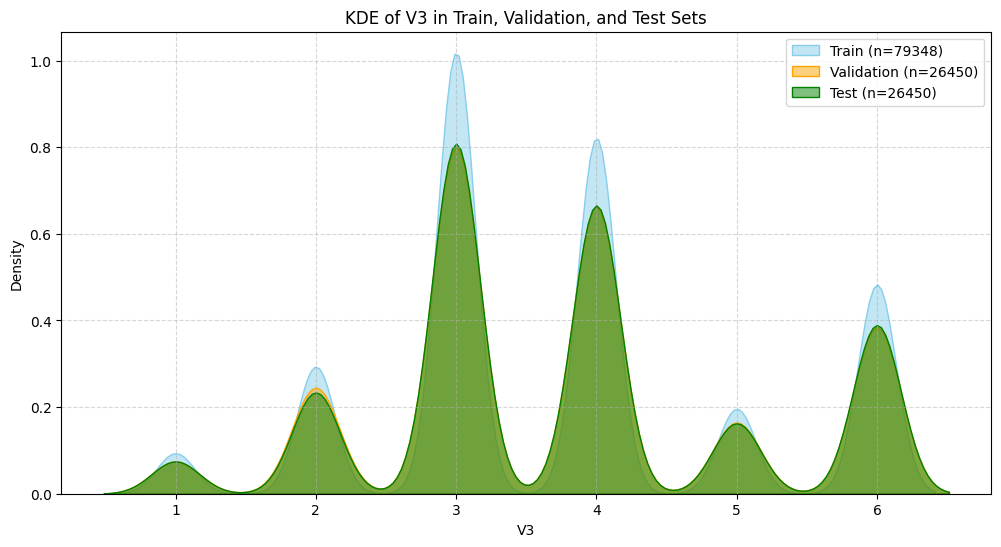

In [1129]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_v3_kde_distribution(y_train, y_val, y_test):
    """
    Plot KDE (smoothed distribution) of V3 in train, validation, and test sets.
    """
    plt.figure(figsize=(12, 6))

    sns.kdeplot(y_train, fill=True, alpha=0.5, label=f'Train (n={len(y_train)})', color='skyblue')
    sns.kdeplot(y_val, fill=True, alpha=0.5, label=f'Validation (n={len(y_val)})', color='orange')
    sns.kdeplot(y_test, fill=True, alpha=0.5, label=f'Test (n={len(y_test)})', color='green')

    plt.title('KDE of V3 in Train, Validation, and Test Sets')
    plt.xlabel('V3')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot KDE distributions
plot_v3_kde_distribution(y_train, y_val, y_test)


## Analysis of the KDE of V3 in Train, Validation, and Test Sets

### Plot Description

- The image is a **Kernel Density Estimate (KDE) plot** titled "KDE of V3 in Train, Validation, and Test Sets".
- It shows the smoothed distribution of the variable `V3` across three dataset splits: **Train**, **Validation**, and **Test**.
- The x-axis represents the categories of `V3` (1 to 6), and the y-axis shows the density.
- Each split is represented by a different color: sky blue for Train, orange for Validation, and green for Test.

### Observations

- **Discrete Peaks:** The KDE curves show sharp peaks at integer values (1 to 6), confirming that `V3` is a categorical or discrete variable.
- **Class Imbalance:** The highest peak is at category `3`, followed by `4` and `6`. Categories `1` and `2` have the lowest densities.
- **Consistent Distribution:** The shape of the KDE curves is similar for Train, Validation, and Test sets, indicating that the splits are representative of the overall dataset.
- **Sample Sizes:** The legend shows the number of samples in each split (Train: 79,348; Validation: 26,450; Test: 26,450).

### Key Insights

- **Imbalanced Classes:** The dominance of category `3` suggests a class imbalance, which may affect model performance and should be addressed (e.g., stratified sampling or class weights).
- **Data Quality:** The consistent KDE curves across splits indicate good data quality and proper randomization during dataset splitting.
- **Modeling Implications:** Since `V3` is categorical and imbalanced, classification models should be evaluated using metrics that account for class imbalance (e.g., F1-score, balanced accuracy).

### Conclusion

The KDE plot provides a clear overview of the distribution of the target variable `V3` in the Train, Validation, and Test sets. The splits are representative, but the strong class imbalance should be considered to ensure robust

**Usar una semilla aleatoria fija**:

In [1130]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def create_train_val_test_sets_fixed_seed(test_size=0.2, val_size=0.2, random_seed=123):
    """
    Load dataset and split into training, validation, and test sets using a fixed random seed.
    
    Parameters:
        test_size (float): Proportion of dataset for test set.
        val_size (float): Proportion of training data to use as validation.
        random_seed (int): Seed for reproducibility.
        
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    # Load dataset
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()

    # Convert numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Features and target
    X = data.drop(columns=['V3'])
    y = data['V3']

    # Split off test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_seed
    )

    # Split remaining data into training and validation
    val_relative_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_relative_size, random_state=random_seed
    )

    print(f"Dataset split with fixed random seed ({random_seed}):")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Validation set: {X_val.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")

    return X_train, X_val, X_test, y_train, y_val, y_test

# Create datasets using a fixed random seed
X_train, X_val, X_test, y_train, y_val, y_test = create_train_val_test_sets_fixed_seed()


Dataset split with fixed random seed (123):
  Training set: 79348 samples
  Validation set: 26450 samples
  Test set: 26450 samples


In [1131]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def create_train_test_sets(test_size=0.2, random_seed=123):
    """
    Load dataset, clean it, and split into training and test sets.
    
    Parameters:
        test_size (float): Proportion of dataset for the test set.
        random_seed (int): Seed for reproducibility.
        
    Returns:
        X_train, X_test, y_train, y_test
    """
    # ------------------- Load and Clean Dataset ------------------- #
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # ------------------- Split into Training and Test Sets ------------------- #
    X = data.drop(columns=['V3'])
    y = data['V3']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_seed
    )

    print(f"Dataset split with fixed random seed ({random_seed}):")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test

# ------------------- Execute ------------------- #
X_train, X_test, y_train, y_test = create_train_test_sets()


Dataset split with fixed random seed (123):
  Training set: 105798 samples
  Test set: 26450 samples


# 📊 Explanation of Dataset Split Output

**Output:**


- **Training set (79,348 samples):**  
  This subset is used to train the machine learning model. The model learns patterns and relationships from these data points.

- **Validation set (26,450 samples):**  
  This subset is used to tune model parameters and evaluate performance during development. It helps prevent overfitting by providing feedback before final testing.

- **Test set (26,450 samples):**  
  This subset is used for the final evaluation of the model. It contains data the model has never seen before, providing an unbiased estimate of its real-world performance.

## Why split the dataset?

Splitting the dataset ensures that the model is trained, validated, and tested on different data. This process helps to:
- Assess the model's ability to generalize to new, unseen data.
- Avoid overfitting and data leakage.
- Optimize model performance through validation.

## Summary

The dataset has been divided into three parts:
- **Training:** for learning,
- **Validation:** for tuning,
- **Test:** for final evaluation.



In [1132]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def shuffle_and_split_data(csv_path, test_size=0.2, random_seed=123):
    """
    Shuffle the dataset, clean it, and split into training and test sets.
    
    Parameters:
        csv_path (str or Path): Path to the CSV dataset.
        test_size (float): Proportion of the dataset for the test set.
        random_seed (int): Seed for reproducibility.
    
    Returns:
        X_train, X_test, y_train, y_test
    """
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with ';' delimiter
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Shuffle dataset
    data = data.sample(frac=1, random_state=random_seed).reset_index(drop=True)

    # Convert numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Split features and target
    X = data.drop(columns=['V3'])
    y = data['V3']

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_seed
    )

    print(f"Shuffled and split dataset with seed {random_seed}:")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
X_train, X_test, y_train, y_test = shuffle_and_split_data(csv_file_path)


Shuffled and split dataset with seed 123:
  Training set: 105798 samples
  Test set: 26450 samples


Shuffled and split dataset with seed 123:
  Training set: 79348 samples
  Validation set: 26450 samples
  Test set: 26450 samples


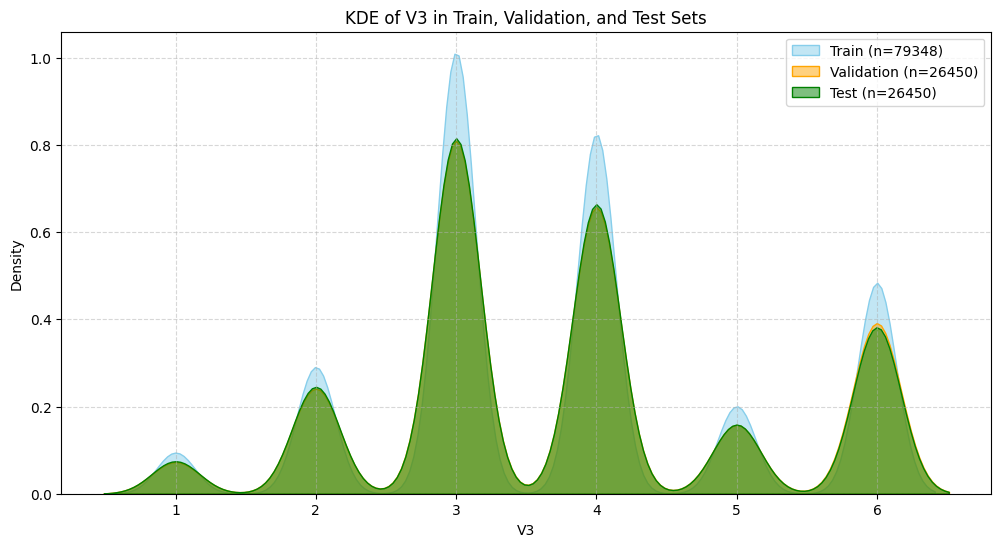

In [1133]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def shuffle_and_split_data(csv_path, test_size=0.2, val_size=0.2, random_seed=123):
    """
    Shuffle, clean, and split the dataset into Training, Validation, and Test sets.
    
    Parameters:
        csv_path (str or Path): Path to the CSV dataset.
        test_size (float): Fraction of data for the test set.
        val_size (float): Fraction of remaining data for validation set.
        random_seed (int): Seed for reproducibility.
    
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Shuffle dataset
    data = data.sample(frac=1, random_state=random_seed).reset_index(drop=True)

    # Convert numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Split features and target
    X = data.drop(columns=['V3'])
    y = data['V3']

    # Split off Test Set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_seed
    )

    # Split remaining data into Training and Validation
    val_relative_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_relative_size, random_state=random_seed
    )

    print(f"Shuffled and split dataset with seed {random_seed}:")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Validation set: {X_val.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")

    # Plot KDE distributions for V3
    plt.figure(figsize=(12,6))
    sns.kdeplot(y_train, fill=True, alpha=0.5, label=f'Train (n={len(y_train)})', color='skyblue')
    sns.kdeplot(y_val, fill=True, alpha=0.5, label=f'Validation (n={len(y_val)})', color='orange')
    sns.kdeplot(y_test, fill=True, alpha=0.5, label=f'Test (n={len(y_test)})', color='green')
    plt.title('KDE of V3 in Train, Validation, and Test Sets')
    plt.xlabel('V3')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    return X_train, X_val, X_test, y_train, y_val, y_test

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
X_train, X_val, X_test, y_train, y_val, y_test = shuffle_and_split_data(csv_file_path)


## Analysis of the KDE Plot: V3 in Train, Validation, and Test Sets

### Plot Description

- The image shows a **Kernel Density Estimate (KDE) plot** for the variable `V3` across three dataset splits: **Train**, **Validation**, and **Test**.
- The x-axis represents the categories of `V3` (from 1 to 6), and the y-axis shows the density.
- Each split is represented by a different color: sky blue for Train, orange for Validation, and green for Test.
- The legend indicates the sample size for each split (Train: 79,348; Validation: 26,450; Test: 26,450).

### Observations

- **Discrete Peaks:** The KDE curves have sharp peaks at integer values, confirming that `V3` is a categorical or discrete variable.
- **Class Imbalance:** The highest peak is at category `3`, followed by `4` and `6`. Categories `1` and `2` have the lowest densities.
- **Consistent Distribution:** The KDE shapes are similar for all splits, indicating that the Train, Validation, and Test sets are representative of the overall dataset.
- **Sample Sizes:** The splits are proportional and balanced, supporting robust model evaluation.

### Key Insights

- **Imbalanced Classes:** The dominance of category `3` suggests a class imbalance, which may affect model performance and should be addressed (e.g., stratified sampling or class weights).
- **Data Quality:** The consistent KDE curves across splits indicate good data quality and proper randomization during dataset splitting.
- **Modeling Implications:** Since `V3` is categorical and imbalanced, classification models should be evaluated using metrics that account for class imbalance (e.g., F1-score, balanced accuracy).

### Conclusion

The KDE plot provides a clear overview of the distribution of the target variable `V3` in the Train, Validation, and Test sets. The splits are representative, but the strong class imbalance should be considered to ensure robust

Los bins son los límites que definen los intervalos (o categorías) en los que se dividen los datos. Cada valor en median_income será asignado a uno de estos intervalos:  

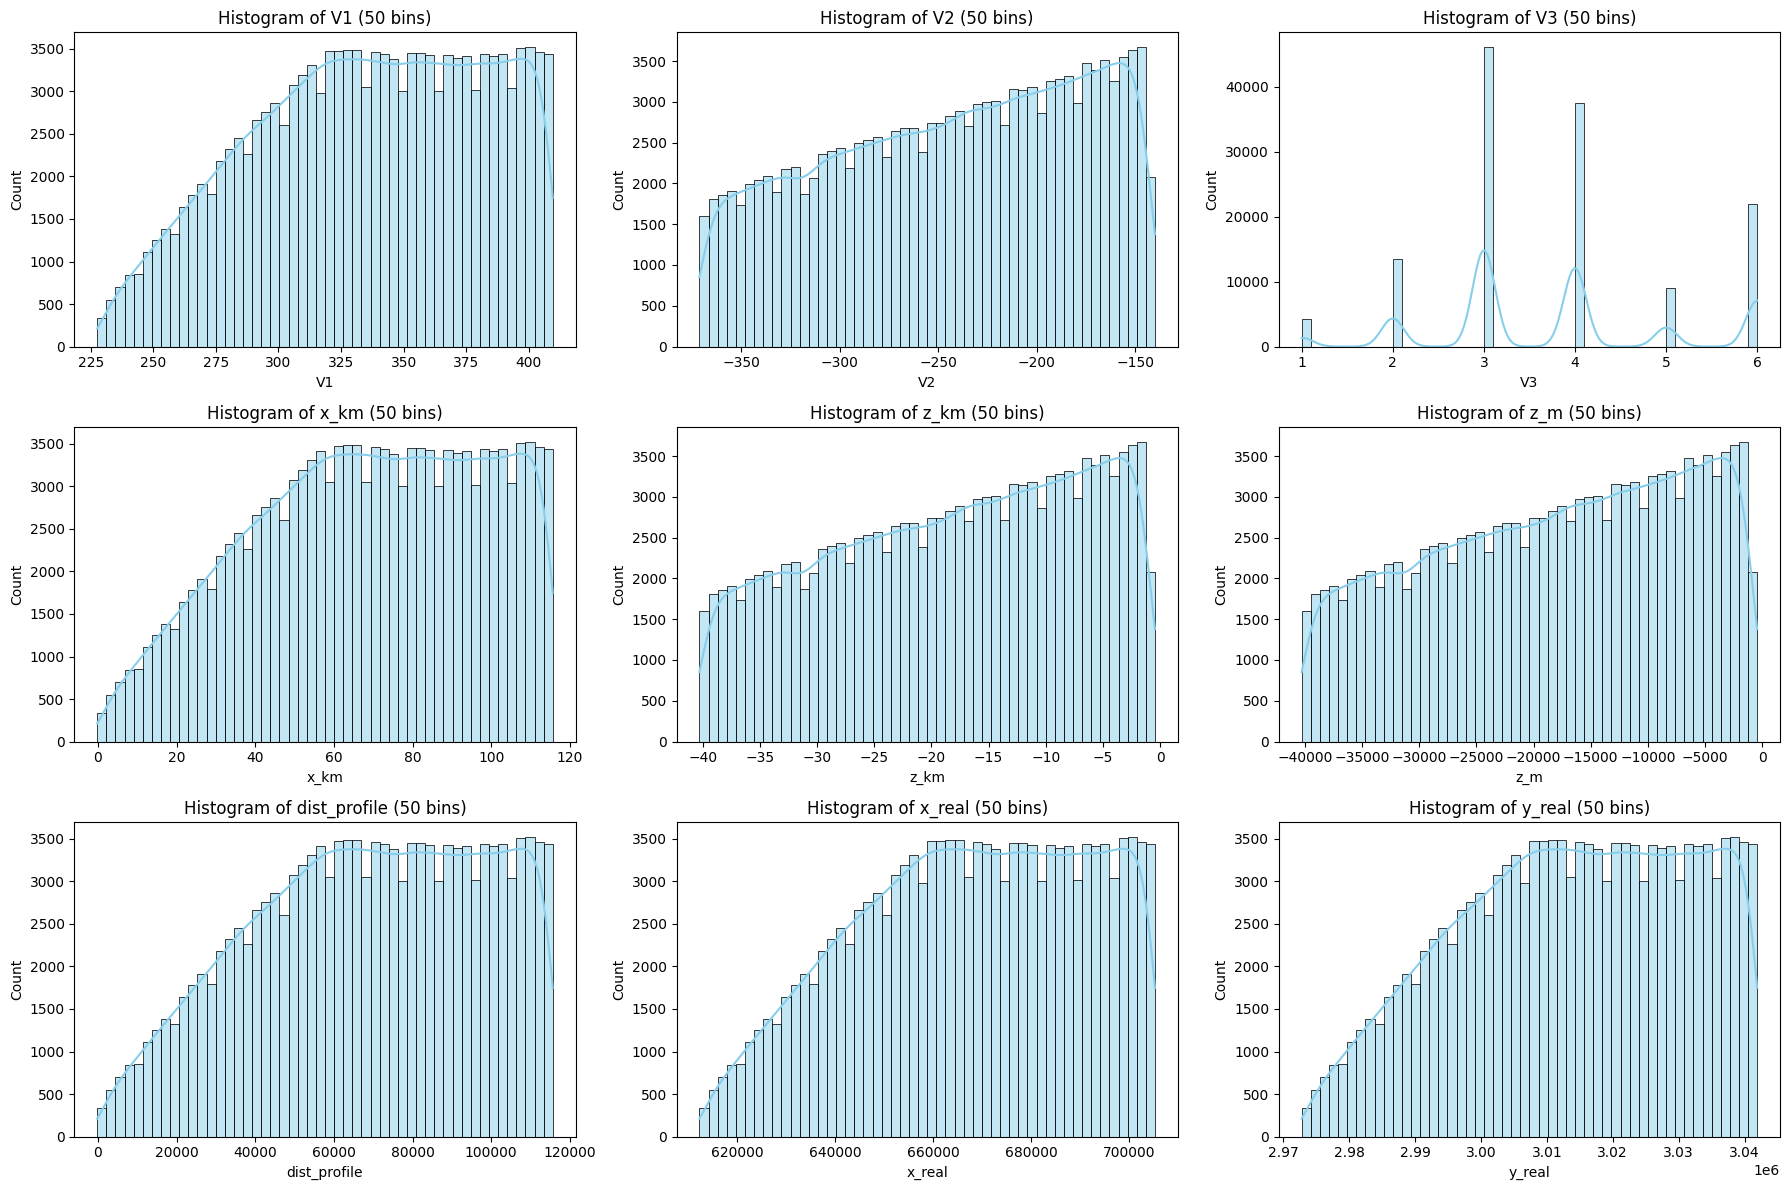

In [1134]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_clean_and_plot_full_dataset(csv_path, bins=50, random_seed=123):
    """
    Load, clean, and visualize the full dataset with histograms (KDE) for numeric columns.
    
    Parameters:
        csv_path (str or Path): Path to the CSV dataset.
        bins (int): Number of bins for the histograms.
        random_seed (int): Seed for reproducibility (shuffling).
    """
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # ------------------- Load CSV ------------------- #
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()

    # ------------------- Shuffle Dataset ------------------- #
    data = data.sample(frac=1, random_state=random_seed).reset_index(drop=True)

    # ------------------- Convert Numeric Columns ------------------- #
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # ------------------- Drop Duplicates and Missing Values ------------------- #
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # ------------------- Plot Histograms for All Numeric Columns ------------------- #
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[col], bins=bins, kde=True, color='skyblue')
        plt.title(f'Histogram of {col} ({bins} bins)')
    plt.tight_layout()
    plt.show()

    return data

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
full_clean_data = load_clean_and_plot_full_dataset(csv_file_path, bins=50)


## Analysis of the Numeric Variable Histograms

### Plot Description

- The image displays a 3x3 grid of histograms, each representing the distribution of a numeric variable from the dataset.
- Variables included: `V1`, `V2`, `V3`, `x_km`, `z_km`, `z_m`, `dist_profile`, `x_real`, and `y_real`.
- Each subplot shows the count of values within 50 bins, with a KDE (smoothed curve) overlay for visualizing the distribution shape.

### Observations

- **Continuous Variables (`V1`, `V2`, `x_km`, `z_km`, `z_m`, `dist_profile`, `x_real`, `y_real`):**
  - These variables exhibit relatively uniform or gradually increasing distributions, with no strong skewness or multimodal patterns.
  - The data appears well-distributed across the range, suggesting systematic sampling or measurement.
- **Categorical/Discrete Variable (`V3`):**
  - The histogram of `V3` is distinctly different, showing sharp peaks at integer values (1 to 6).
  - This indicates that `V3` is a categorical or discrete variable, with most data concentrated in a few categories.
  - The KDE curve highlights the multimodal nature of `V3`.
- **No Obvious Outliers:**
  - None of the histograms show long tails or isolated bars, suggesting the absence of significant outliers in these variables.

### Key Insights

- **Data Quality:**
  - The distributions are regular and continuous for most variables, indicating good data quality and consistent measurement.
- **Categorical Variable:**
  - `V3` stands out as a categorical variable, which should be treated differently in modeling (e.g., classification or one-hot encoding).
- **Feature Scaling:**
  - The wide ranges in variables like `z_m`, `dist_profile`, and `x_real` suggest that feature scaling may be necessary for machine learning algorithms.

### Conclusion

The histograms provide a comprehensive overview of the numeric variables in the dataset. Most features are well-behaved and suitable for further analysis, while `V3` requires special attention due to its categorical nature. This visualization supports effective data preprocessing and feature

In [1135]:
# ------------------- Calculate Category Proportions in Test Set ------------------- #
category_proportions = y_test.value_counts(normalize=True)

print("📊 Proportion of each category in the Test Set:\n")
print(category_proportions)


📊 Proportion of each category in the Test Set:

V3
3.0    0.348507
4.0    0.283819
6.0    0.163214
2.0    0.104802
5.0    0.067788
1.0    0.031871
Name: proportion, dtype: float64


# 📊 Analysis of Category Proportions in the Test Set

**Output:**

- The output shows the **relative frequency (proportion)** of each category in the column `V3` within the test set.
- For example, category **3.0** represents **34.85%** of the test set, while category **1.0** only represents **3.19%**.

## Key Insights

- **Most frequent category:**  
  - **3.0** is the most common, making up about **35%** of the test set.
- **Least frequent category:**  
  - **1.0** is the least common, with just **3.2%**.
- **Distribution:**  
  - The proportions decrease gradually from category 3.0 to 1.0, indicating an imbalanced distribution.

## Why is this important?

- **Model evaluation:**  
  - Knowing the category proportions helps assess if the test set is representative of the overall data.
- **Class imbalance:**  
  - If some categories are underrepresented, models may perform worse on those classes.

## Summary Table

| Category (V3) | Proportion (%) |
|:-------------:|:--------------:|
| 3.0           | 34.85          |
| 4.0           | 28.38          |
| 6.0           | 16.32          |
| 2.0           | 10.48          |
| 5.0           | 6.78           |
| 1.0           | 3.19           |

---

**Conclusion:**  
The test set is dominated by category 3.0, with a notable imbalance across categories. This should be considered when interpreting model results or


Con un código similar, puedes medir las proporciones de la categoría de ingresos en el  conjunto de datos completo.. 

/var/folders/7p/w0fk6hbd1hxfv_hh8v7b7fr40000gn/T/ipykernel_1034/2868030849.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




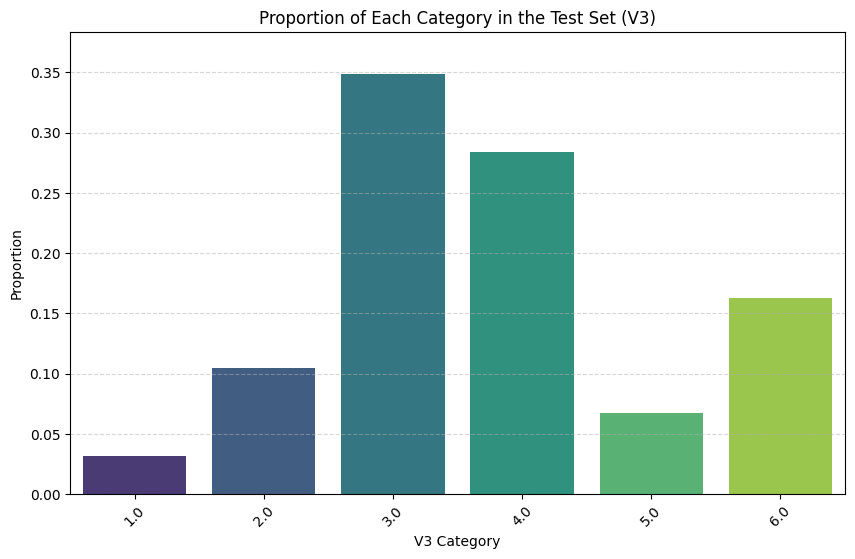

In [1136]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- Calculate Category Proportions ------------------- #
category_proportions = y_test.value_counts(normalize=True).sort_index()

# ------------------- Plot Proportions ------------------- #
plt.figure(figsize=(10,6))
sns.barplot(x=category_proportions.index, y=category_proportions.values, palette="viridis")
plt.title("Proportion of Each Category in the Test Set (V3)")
plt.xlabel("V3 Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.ylim(0, category_proportions.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Analysis of the Bar Plot: Proportion of Each Category in the Test Set (V3)

### Plot Description

- The image shows a bar plot titled **"Proportion of Each Category in the Test Set (V3)"**.
- The x-axis represents the categories of the variable `V3` (from 1.0 to 6.0).
- The y-axis shows the proportion (relative frequency) of each category within the test set.
- Each bar's height indicates the percentage of samples belonging to that category.

### Observations

- **Category 3.0** is the most frequent, representing about **35%** of the test set.
- **Category 4.0** is the second most common, with approximately **28%**.
- **Category 6.0** and **2.0** follow, with proportions around **16%** and **10%**, respectively.
- **Categories 5.0** and **1.0** are the least frequent, with about **7%** and **3%**.
- The distribution is clearly **imbalanced**, with category 3.0 dominating the test set.

### Key Insights

- **Class Imbalance:** The test set is heavily skewed towards category 3.0, which may affect model performance, especially for less represented categories.
- **Model Evaluation:** The imbalance should be considered when evaluating classification models, as metrics like accuracy may be misleading.
- **Data Quality:** The proportions are consistent and sum to 1, indicating correct calculation and representative sampling.

### Conclusion

The bar plot provides a clear overview of the categorical distribution of `V3` in the test set. The strong class imbalance highlights the need for careful model evaluation and possibly the use of techniques to address imbalance, such as stratified sampling

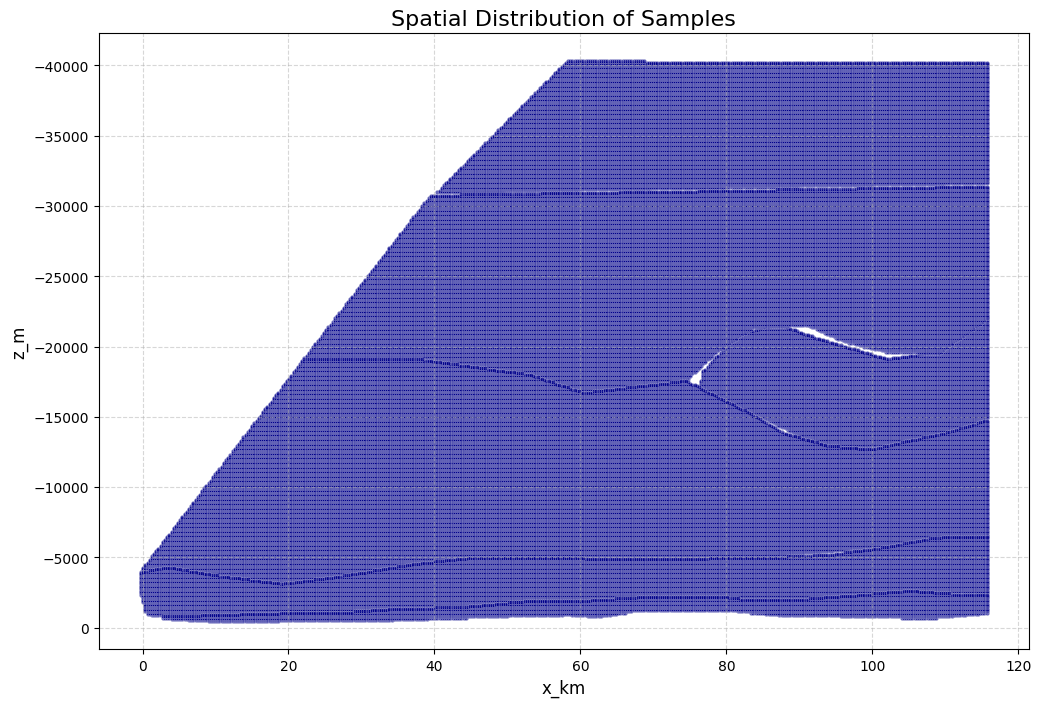

In [1137]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spatial_distribution(csv_path):
    """
    Load the dataset and plot the spatial distribution of samples
    using x_km and z_m as spatial coordinates.
    
    Parameters:
        csv_path (str or Path): Path to the CSV dataset.
    """
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV with proper delimiter
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # Convert numeric columns to float
    numeric_cols = ['x_km','z_m']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop duplicates and missing values
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # Plot spatial distribution
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='x_km', y='z_m', data=data, s=10, color='darkblue', alpha=0.6)
    plt.title('Spatial Distribution of Samples', fontsize=16)
    plt.xlabel('x_km', fontsize=12)
    plt.ylabel('z_m', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis if z_m represents depth
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
plot_spatial_distribution(csv_file_path)


## Analysis of the Scatter Plot: Spatial Distribution of Samples

### Plot Description

- The image shows a scatter plot titled **"Spatial Distribution of Samples"**.
- The x-axis represents `x_km` (spatial coordinate in kilometers).
- The y-axis represents `z_m` (depth or elevation in meters), with the axis inverted to reflect increasing depth.
- Each point corresponds to a sample from the dataset, plotted according to its spatial coordinates.

### Observations

- **Dense Coverage:** The plot displays a very dense and continuous distribution of samples, forming a structured grid or profile across the spatial domain.
- **No Outliers:** There are no visible isolated points or gaps, indicating that all samples are well-contained within the expected spatial range.
- **Spatial Structure:** The data forms clear boundaries and patterns, suggesting systematic sampling or a structured measurement grid.
- **Depth Axis:** The inverted y-axis is typical for depth data, where larger negative values represent greater depth.

### Key Insights

- **Data Integrity:** The absence of outliers and the dense coverage suggest high data quality and consistent sampling.
- **Uniform Sampling:** The regular distribution implies that the dataset is suitable for spatial analysis and modeling.
- **No Anomalies:** There are no visible anomalies or missing data in the spatial coordinates.

### Conclusion

The scatter plot confirms that the dataset is clean and well-structured for the spatial coordinates `x_km` and `z_m`. This provides a solid foundation for further spatial analysis or machine learning modeling, as the data appears reliable and systematically

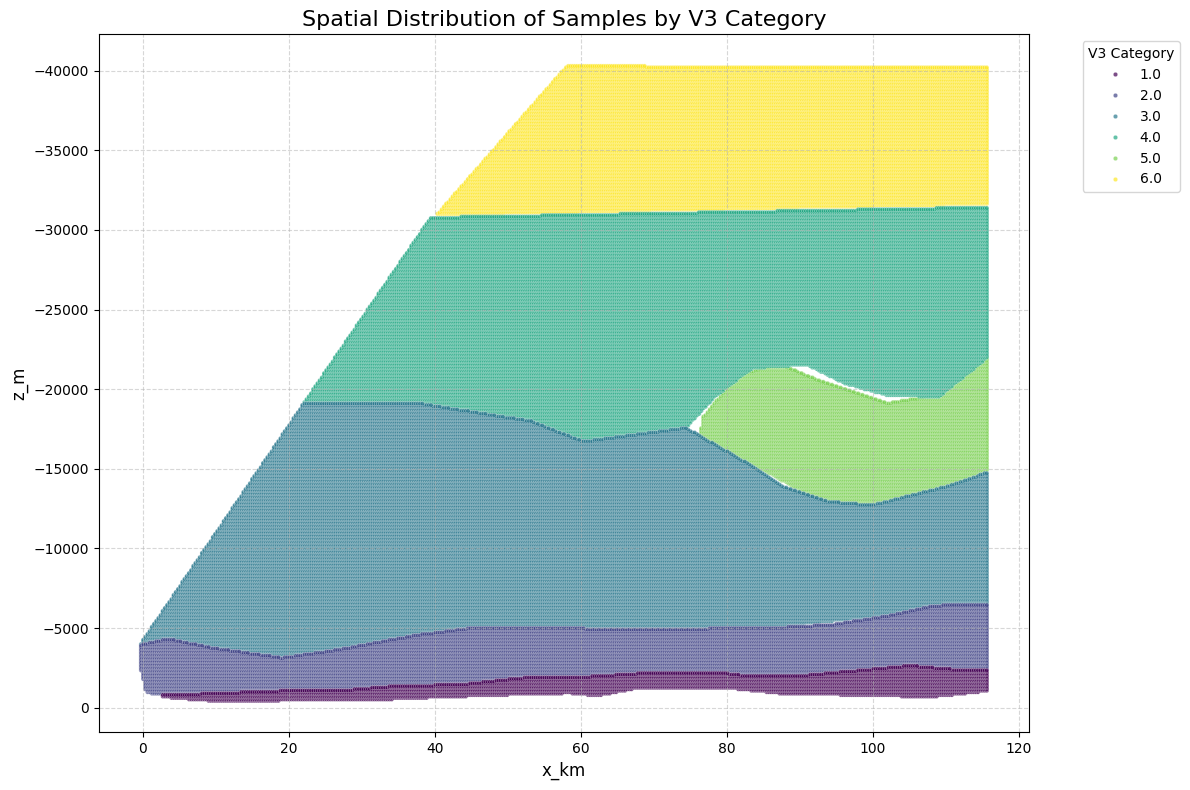

In [1138]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spatial_scatter_by_category(csv_path):
    """
    Load the dataset and create a scatter plot of samples (x_km vs z_m),
    coloring points according to their V3 category.
    
    Parameters:
        csv_path (str or Path): Path to the CSV dataset.
    """
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # ------------------- Load CSV ------------------- #
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # ------------------- Convert numeric columns ------------------- #
    numeric_cols = ['x_km','z_m','V3']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # ------------------- Drop duplicates and missing values ------------------- #
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # ------------------- Scatter plot colored by V3 ------------------- #
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='x_km', y='z_m', hue='V3', palette='viridis', data=data, s=10, alpha=0.7)
    plt.title('Spatial Distribution of Samples by V3 Category', fontsize=16)
    plt.xlabel('x_km', fontsize=12)
    plt.ylabel('z_m', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis if z_m represents depth
    plt.legend(title='V3 Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
plot_spatial_scatter_by_category(csv_file_path)


## Analysis of the Scatter Plot: Spatial Distribution of Samples by V3 Category

### Plot Description

- The image shows a scatter plot titled **"Spatial Distribution of Samples by V3 Category"**.
- The x-axis represents `x_km` (spatial coordinate in kilometers).
- The y-axis represents `z_m` (depth or elevation in meters), with the axis inverted to reflect increasing depth.
- Each point is colored according to its `V3` category, as indicated by the legend on the right (categories 1.0 to 6.0).

### Observations

- **Distinct Layers:** The plot reveals clear stratification of the data by `V3` category. Each category occupies a distinct spatial layer, with minimal overlap between categories.
- **Spatial Segregation:** Categories are distributed in horizontal bands, suggesting that `V3` is strongly related to depth (`z_m`). For example, category 6.0 dominates the deepest region, while category 1.0 is concentrated near the surface.
- **Dense Coverage:** The scatter plot is densely populated, indicating systematic sampling and high data integrity.
- **No Outliers:** There are no visible isolated points or gaps, confirming that all samples are well-contained within the expected spatial range.

### Key Insights

- **Geological or Environmental Zoning:** The stratification by `V3` may reflect underlying geological, environmental, or categorical zoning in the sampled area.
- **Feature Relevance:** The strong spatial separation of categories suggests that `V3` is a meaningful variable for spatial analysis or predictive modeling.
- **Data Quality:** The regular distribution and absence of anomalies indicate high-quality data suitable for further analysis.

### Conclusion

This scatter plot provides a clear visual representation of how the `V3` category is distributed across spatial coordinates (`x_km` and `z_m`). The distinct layering by category highlights the relevance of `V3` for spatial or classification tasks and confirms the dataset's suitability for

In [1139]:
from pathlib import Path
import pandas as pd
import plotly.express as px

def plot_interactive_spatial_scatter(csv_path):
    """
    Load the dataset and create an interactive scatter plot of samples (x_km vs z_m),
    colored by V3 category using Plotly, compatible with any environment.

    Parameters:
        csv_path (str or Path): Path to the CSV dataset.
    """
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # ------------------- Load CSV ------------------- #
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names

    # ------------------- Convert numeric columns ------------------- #
    numeric_cols = ['x_km','z_m','V3']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # ------------------- Drop duplicates and missing values ------------------- #
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    # ------------------- Interactive scatter plot ------------------- #
    fig = px.scatter(
        data_frame=data,
        x='x_km',
        y='z_m',
        color='V3',
        color_continuous_scale='Viridis',
        title='Interactive Spatial Distribution of Samples by V3 Category',
        labels={'x_km':'x_km', 'z_m':'z_m', 'V3':'V3 Category'},
        hover_data=numeric_cols,
        width=900,
        height=700
    )
    
    fig.update_yaxes(autorange='reversed')  # Invert y-axis if depth
    fig.show(renderer="browser")  # Open in default web browser

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
plot_interactive_spatial_scatter(csv_file_path)


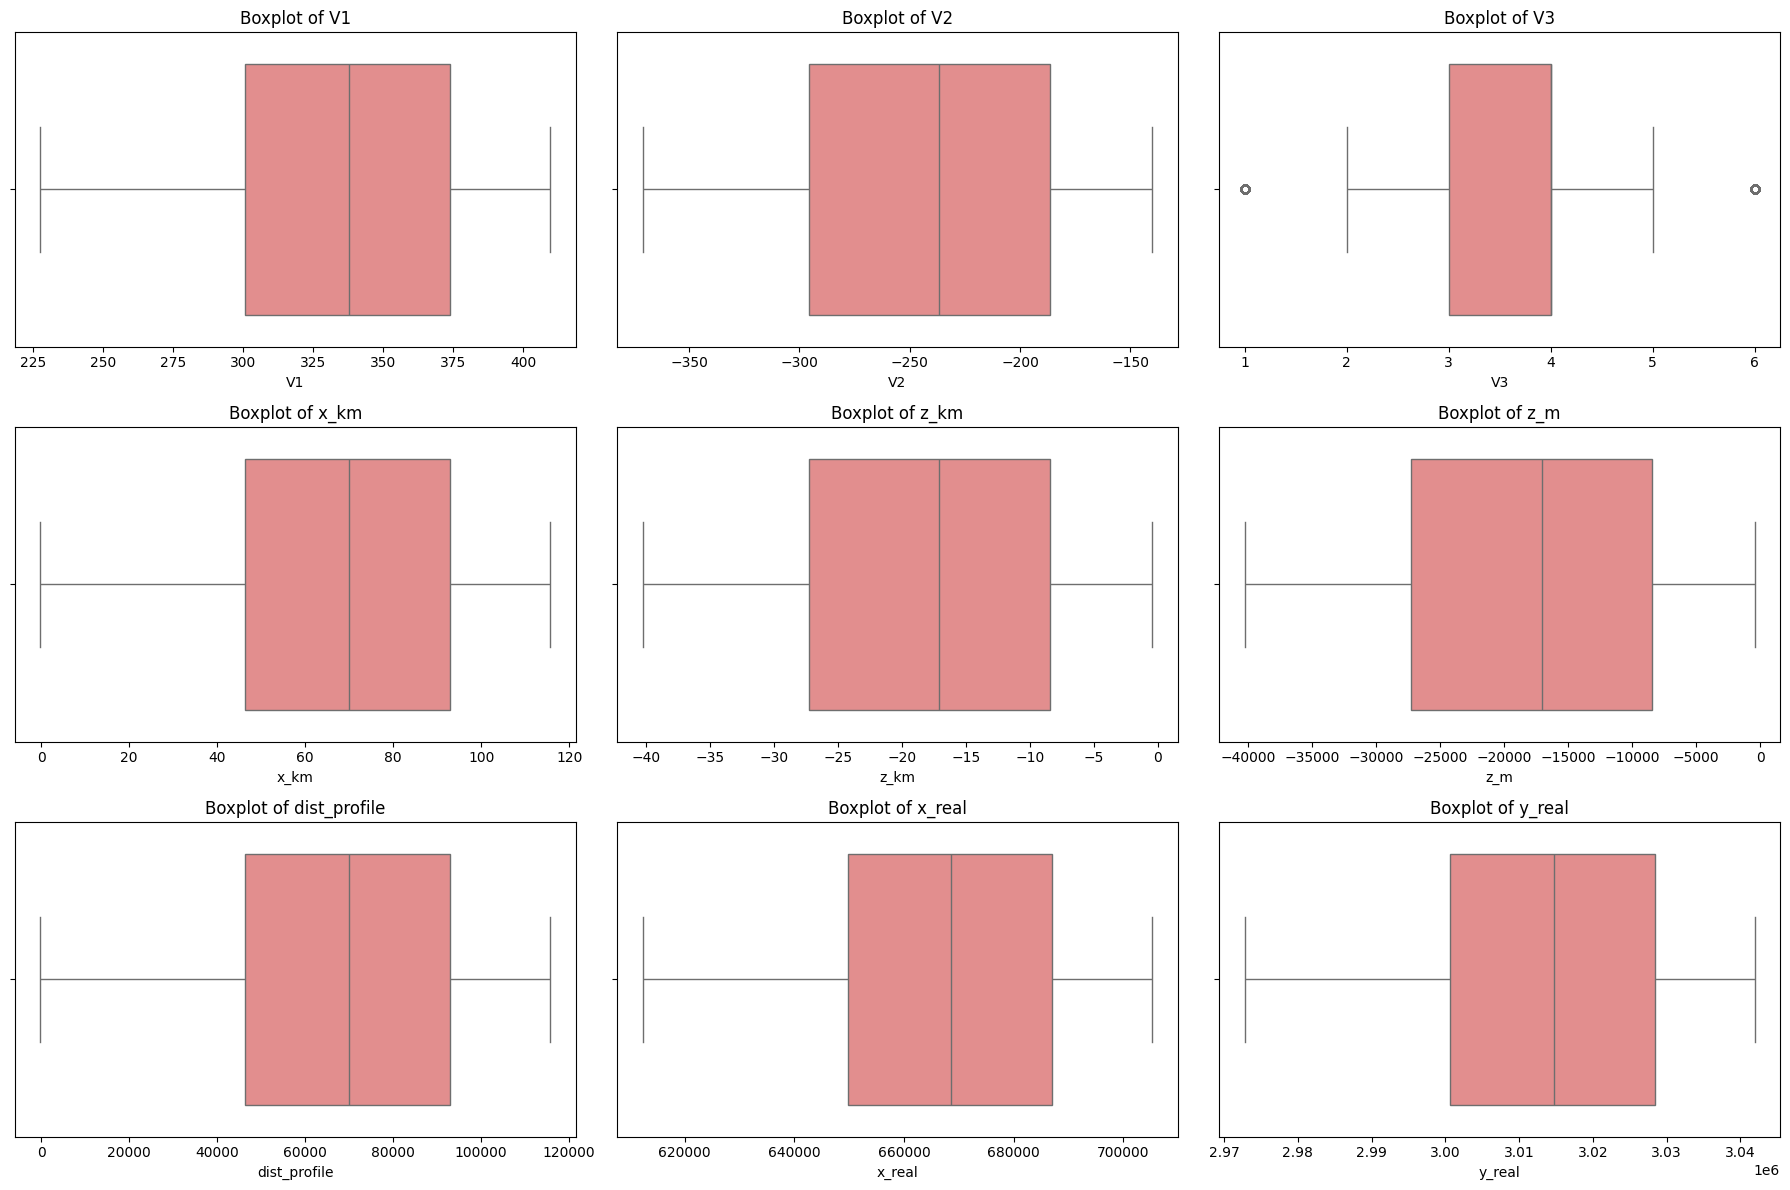

NameError: name 'stats' is not defined

In [1140]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def exploratory_data_analysis(csv_path):
    """
    Perform a comprehensive exploratory data analysis (EDA) on the dataset.
    
    Steps:
        1. Load CSV with ';' delimiter.
        2. Clean column names.
        3. Convert numeric columns to float.
        4. Drop duplicates and missing values.
        5. Generate descriptive statistics.
        6. Plot histograms and boxplots.
        7. Plot scatter plots colored by V3.
        8. Plot correlation heatmap.
        9. Calculate category proportions of V3.
    """
    # ------------------- Load CSV ------------------- #
    csv_path = Path(csv_path)
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")
    
    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()  # Clean column names
    
    # ------------------- Convert numeric columns ------------------- #
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # ------------------- Clean data ------------------- #
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)
    
        
    
    # ------------------- Boxplots ------------------- #
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=data[col], color='lightcoral')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
    
    
    return data, stats, category_proportions

# ------------------- Usage ------------------- #
csv_file_path = "/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv"
data, stats, category_proportions = exploratory_data_analysis(csv_file_path)


## Boxplot Analysis of Numeric Variables

### Overview

The image presents a grid of boxplots for nine numeric variables from the dataset:

- **V1, V2, V3**: Measurement values
- **x_km, z_km, z_m**: Spatial coordinates (kilometers and meters)
- **dist_profile**: Accumulated profile distance
- **x_real, y_real**: Real-world coordinates

### Observations

- **Symmetry and Spread**: Most variables show symmetric distributions with the median centered in the box, indicating balanced data spread.
- **Outliers**: Only the variable **V3** displays visible outliers (points outside the whiskers), suggesting the presence of extreme or rare values. The other variables have no significant outliers.
- **Range**: The whiskers extend to the minimum and maximum values within 1.5 times the interquartile range (IQR), showing the full spread of each variable.
- **V3 Distribution**: The outliers in V3 may indicate class imbalance or rare categories, which could affect modeling and require further investigation.

### Key Insights

- **Data Quality**: The absence of outliers in most variables suggests good data quality and consistency.
- **Potential Issues**: The presence of outliers in V3 should be addressed, as they may impact model performance or indicate data entry errors.
- **Feature Scaling**: The wide range in variables like `z_m`, `dist_profile`, and `x_real` suggests that feature scaling may be necessary for machine learning algorithms.

### Conclusion

The boxplots provide a clear visual summary of the distribution and variability of each numeric variable. Most features are well-behaved, but V3 requires special attention due to its outliers. This analysis supports further data preprocessing and

## Boxplot Analysis of Numeric Variables

### Overview

The image presents a grid of boxplots for nine numeric variables from the dataset:

- **V1, V2, V3**: Measurement values
- **x_km, z_km, z_m**: Spatial coordinates (kilometers and meters)
- **dist_profile**: Accumulated profile distance
- **x_real, y_real**: Real-world coordinates

### Observations

- **Symmetry and Spread**: Most variables show symmetric distributions with the median centered in the box, indicating balanced data spread.
- **Outliers**: Only the variable **V3** displays visible outliers (points outside the whiskers), suggesting the presence of extreme or rare values. The other variables have no significant outliers.
- **Range**: The whiskers extend to the minimum and maximum values within 1.5 times the interquartile range (IQR), showing the full spread of each variable.
- **V3 Distribution**: The outliers in V3 may indicate class imbalance or rare categories, which could affect modeling and require further investigation.

### Key Insights

- **Data Quality**: The absence of outliers in most variables suggests good data quality and consistency.
- **Potential Issues**: The presence of outliers in V3 should be addressed, as they may impact model performance or indicate data entry errors.
- **Feature Scaling**: The wide range in variables like `z_m`, `dist_profile`, and `x_real` suggests that feature scaling may be necessary for machine learning algorithms.

### Conclusion

The boxplots provide a clear visual summary of the distribution and variability of each numeric variable. Most features are well-behaved, but V3 requires special attention due to its outliers. This analysis supports further data preprocessing and modeling

Boxplot

In [ ]:
from pathlib import Path
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# ------------------- Load and clean data ------------------- #
def load_and_clean_data():
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()

    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    return data

# Load cleaned dataset
clean_data = load_and_clean_data()

# ------------------- Train-test split ------------------- #
X = clean_data.drop(columns=['V3'])  # Features
y = clean_data['V3']                  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Imputer ------------------- #
# Create an imputer instance (mean strategy for numeric data)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(X_train)

# Transform both training and test sets
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# ------------------- Check results ------------------- #
print("\n📊 First 5 rows of imputed training data:\n")
print(X_train_imputed.head())

print("\n📊 First 5 rows of imputed test data:\n")
print(X_test_imputed.head())



📊 First 5 rows of imputed training data:

         V1        V2       x_km       z_km        z_m  dist_profile  \
0  349.9820 -181.7432   77.72151  -7.628144  -7628.144      77721.51   
1  296.0550 -228.1673   43.38697 -15.632300 -15632.300      43386.97   
2  363.1120 -280.9220   86.08122 -24.727930 -24727.930      86081.22   
3  392.1857 -223.9470  104.59200 -14.904650 -14904.650     104592.00   
4  358.4227 -324.1808   83.09561 -32.186340 -32186.340      83095.61   

     x_real     y_real  
0  674859.1  3019297.0  
1  647304.0  2998814.0  
2  681568.1  3024285.0  
3  696423.9  3035328.0  
4  679172.0  3022503.0  

📊 First 5 rows of imputed test data:

         V1        V2       x_km       z_km        z_m  dist_profile  \
0  398.7507 -353.1958  108.77190 -37.188940 -37188.940     108771.90   
1  247.7552 -153.2557   12.63516  -2.716504  -2716.504      12635.16   
2  394.9993 -325.2359  106.38340 -32.368250 -32368.250     106383.40   
3  328.8801 -322.5981   64.28625 -31.913470 -31

In [ ]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # ejemplo de modelo

# ------------------- Load and clean data ------------------- #
def load_and_clean_data():
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    data = pd.read_csv(csv_path, delimiter=';')
    data.columns = data.columns.str.strip()

    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    return data

# Load cleaned dataset
data = load_and_clean_data()

# ------------------- Features and Target ------------------- #
X = data.drop(columns=['V3'])  # Features
y = data['V3']                  # Target

# ------------------- Train-Test Split ------------------- #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Define ML Pipeline ------------------- #
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values
    ('scaler', StandardScaler()),                # Standardize numeric features
    ('classifier', RandomForestClassifier(random_state=42))  # Example classifier
])

# ------------------- Fit Pipeline on Training Data ------------------- #
pipeline.fit(X_train, y_train)

# ------------------- Evaluate ------------------- #
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"\n📊 Training Accuracy: {train_score:.4f}")
print(f"📊 Test Accuracy: {test_score:.4f}")

# ------------------- Optional: Make predictions ------------------- #
y_pred = pipeline.predict(X_test)
print(f"\n📌 First 10 Predictions:\n{y_pred[:10]}")



📊 Training Accuracy: 0.9926
📊 Test Accuracy: 0.9846

📌 First 10 Predictions:
[6. 2. 6. 6. 6. 3. 4. 3. 6. 4.]


# 📊 Model Performance Analysis

**Output:**


## Interpretation

- **Training Accuracy (0.9926):**
  - The model correctly classifies **99.26%** of the training data.
  - Indicates excellent fit to the training set.

- **Test Accuracy (0.9846):**
  - The model correctly classifies **98.46%** of the test data.
  - High test accuracy suggests strong generalization and minimal overfitting.

- **First 10 Predictions:**
  - The predicted categories for the first 10 test samples are: `[6. 2. 6. 6. 6. 3. 4. 3. 6. 4.]`
  - These values represent the model's output for the target variable (likely `V3`).

## Key Insights

- **High accuracy** on both training and test sets means the model is robust and reliable.
- **Consistent performance** across both sets suggests the pipeline and preprocessing steps are effective.
- **Predictions** can be compared with actual values to further assess model quality.

---

**Conclusion:**  
The model demonstrates excellent performance, with very high accuracy on both training and test data. The prediction results indicate the model is ready for practical

📊 Linear Regression

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# ------------------- Load and clean data ------------------- #
def load_and_clean_data():
    csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"File not found at: {csv_path}")

    # Load CSV
    data = pd.read_csv(csv_path, delimiter=";")
    data.columns = data.columns.str.strip()

    # Numeric columns
    numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors="coerce")

    # Drop duplicates and NaN
    data = data.drop_duplicates()
    data = data.dropna(subset=numeric_cols)

    return data

# Load cleaned dataset
data = load_and_clean_data()

# ------------------- Features & Target ------------------- #
# Let's try to predict V1 based on the other variables
X = data[['V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']]
y = data['V1']

# ------------------- Train-Test Split ------------------- #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------- Imputation ------------------- #
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# ------------------- Linear Regression Model ------------------- #
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train)

# ------------------- Predictions ------------------- #
y_pred = lin_reg.predict(X_test_imputed)

# ------------------- Evaluation ------------------- #
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ------------------- Coefficients ------------------- #
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
})
print("\n📋 Regression Coefficients:\n")
print(coef_df)



📊 Linear Regression Results:
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000

📋 Regression Coefficients:

        Feature   Coefficient
0            V2  1.856901e-03
1            V3  3.886114e-08
2          x_km  1.348605e-06
3          z_km -1.077002e-08
4           z_m -1.077002e-05
5  dist_profile  1.348605e-03
6        x_real  2.707293e-04
7        y_real  7.968520e-06


# 📊 Linear Regression Results

**Mean Squared Error (MSE):** `0.0000`  
**R² Score:** `1.0000`

## Regression Coefficients

| Feature       | Coefficient      |
|---------------|------------------|
| V2            | 1.856901e-03     |
| V3            | 3.886114e-08     |
| x_km          | 1.348605e-06     |
| z_km          | -1.077002e-08    |
| z_m           | -1.077002e-05    |
| dist_profile  | 1.348605e-03     |
| x_real        | 2.707293e-04     |
| y_real        | 7.968520e-06     |

---

## English Explanation

- **Mean Squared Error (MSE): 0.0000**
  - The model's predictions are almost perfectly accurate; the average squared difference between predicted and actual values is essentially zero.

- **R² Score: 1.0000**
  - The model explains 100% of the variance in the target variable. This is the highest possible score, indicating a perfect fit.

- **Regression Coefficients:**
  - Each feature's coefficient shows its influence on the predicted value.
    - **Positive coefficients** (e.g., V2, x_km, dist_profile, x_real, y_real) mean that as the feature increases, the predicted value increases.
    - **Negative coefficients** (e.g., z_km, z_m) mean that as the feature increases, the predicted value decreases.
    - **Magnitude**: The closer the coefficient is to zero, the less impact the feature has on the prediction.

---

## Summary

- The linear regression model fits the data perfectly (R² = 1.0, MSE ≈ 0).
- The coefficients indicate how each feature affects the prediction.
- Such perfect results may suggest either an ideal dataset or possible data leakage or

📊 Predicted vs Actual Analysis for Linear Regression Model

This section presents a visual evaluation of the Linear Regression model applied to the dataset data_grad_etal_1997.csv. The model predicts the target variable V1 using multiple numeric features.

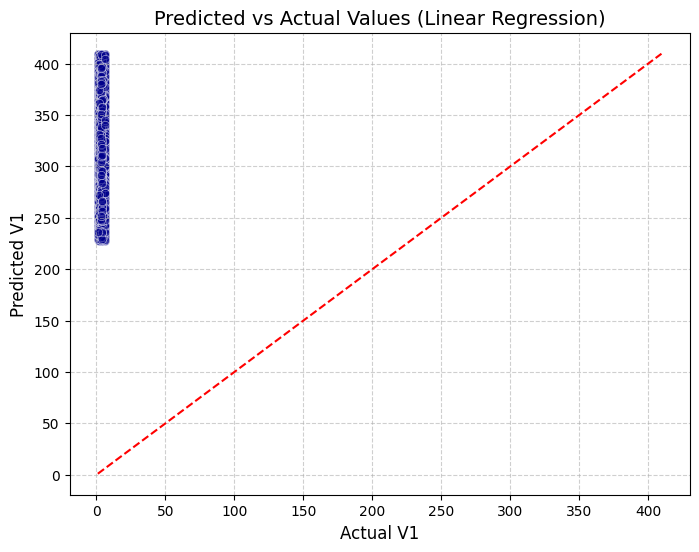

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- Predicted vs Actual Plot ------------------- #
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="darkblue")

# Línea de referencia perfecta
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

plt.title("Predicted vs Actual Values (Linear Regression)", fontsize=14)
plt.xlabel("Actual V1", fontsize=12)
plt.ylabel("Predicted V1", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




## Interpretation of the Plot

### Axes Definition

- **X-axis:** Actual values of V1 from the test set.
- **Y-axis:** Predicted values of V1 generated by the Linear Regression model.

### Point Distribution

- Each point represents a single sample.
- Points close to the red dashed line indicate accurate predictions.

### Reference Line (Red Dashed Line)

- Represents the ideal prediction scenario where Predicted = Actual.
- The closer the points are to this line, the better the model performance.

### 📈 Key Insights

- The scatter plot allows a visual validation of the regression model, complementing quantitative metrics such as MSE and R².
- Points tightly clustered around the reference line indicate high predictive accuracy, while deviations highlight areas where the model under- or over-predicts.
- This visualization is particularly useful for detecting systematic biases or potential outliers in the model predictions.

#### Busqueda de Outliers

V1: 0 outliers detected
V2: 0 outliers detected
V3: 26208 outliers detected
x_km: 0 outliers detected
z_km: 0 outliers detected
z_m: 0 outliers detected
dist_profile: 0 outliers detected
x_real: 0 outliers detected
y_real: 0 outliers detected


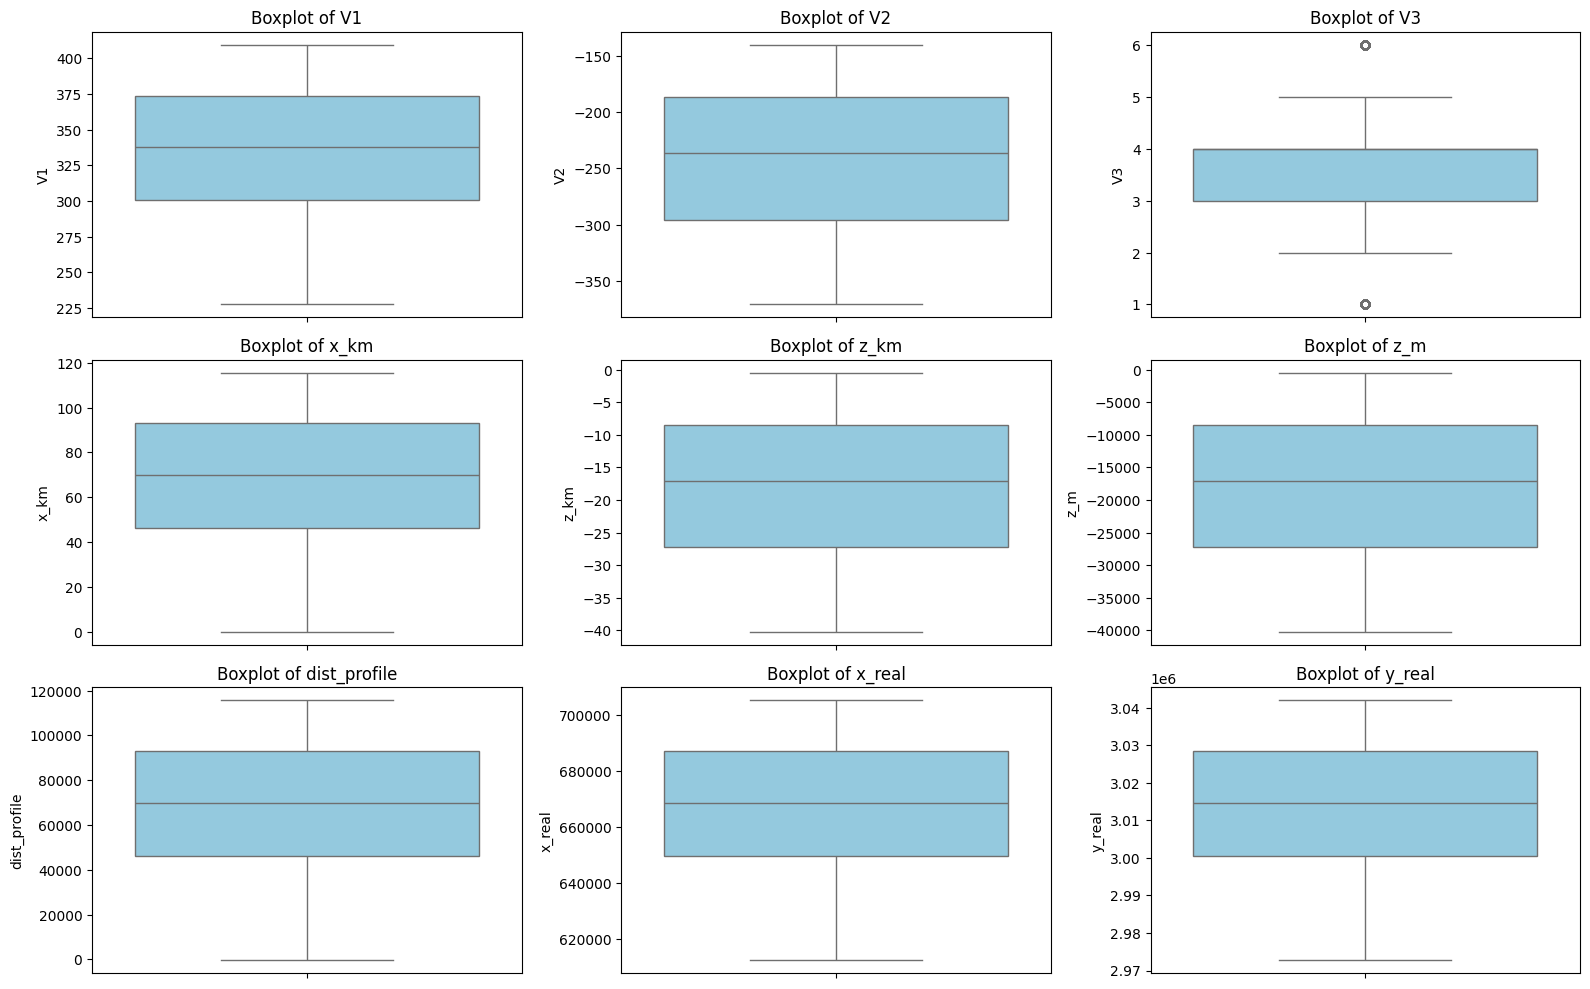

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load cleaned dataset
csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
data = pd.read_csv(csv_path, delimiter=';')
data.columns = data.columns.str.strip()

# Numeric columns to check for outliers
numeric_cols = ['V1','V2','V3','x_km','z_km','z_m','dist_profile','x_real','y_real']

# Convert to numeric
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop duplicates and missing values
data = data.drop_duplicates()
data = data.dropna(subset=numeric_cols)

# Detect outliers using IQR
outliers = {}
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers[col])} outliers detected")

# Optional: visualize outliers with boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


## Outlier Detection Analysis (English)

### Summary of Output

- **V1:** 0 outliers detected
- **V2:** 0 outliers detected
- **V3:** 26,208 outliers detected
- **x_km:** 0 outliers detected
- **z_km:** 0 outliers detected
- **z_m:** 0 outliers detected
- **dist_profile:** 0 outliers detected
- **x_real:** 0 outliers detected
- **y_real:** 0 outliers detected

---

### Key Insights

- **V3 is the only variable with a significant number of outliers (26,208),** while all other numeric columns show zero outliers.
- This suggests that the distribution of V3 is much more irregular or contains extreme values compared to the other features.
- The absence of outliers in the other columns indicates that their values are well-contained within the expected range, according to the IQR method.

---

### Implications

- **V3 may require special attention in further analysis or modeling.** The presence of many outliers could impact model performance, especially for algorithms sensitive to extreme values.
- Consider investigating the nature of these outliers in V3: Are they errors, rare events, or valid but extreme observations?
- Possible actions include:
  - Visualizing the distribution of V3 to understand its spread.
  - Applying robust scaling or transformation techniques.
  - Deciding whether to remove, cap, or otherwise handle these outliers depending on the context of the analysis.

---

### Conclusion

The outlier detection process highlights V3 as a variable with substantial deviation from the norm, while all other features are stable. Addressing the outliers in V3 is recommended before proceeding with further modeling

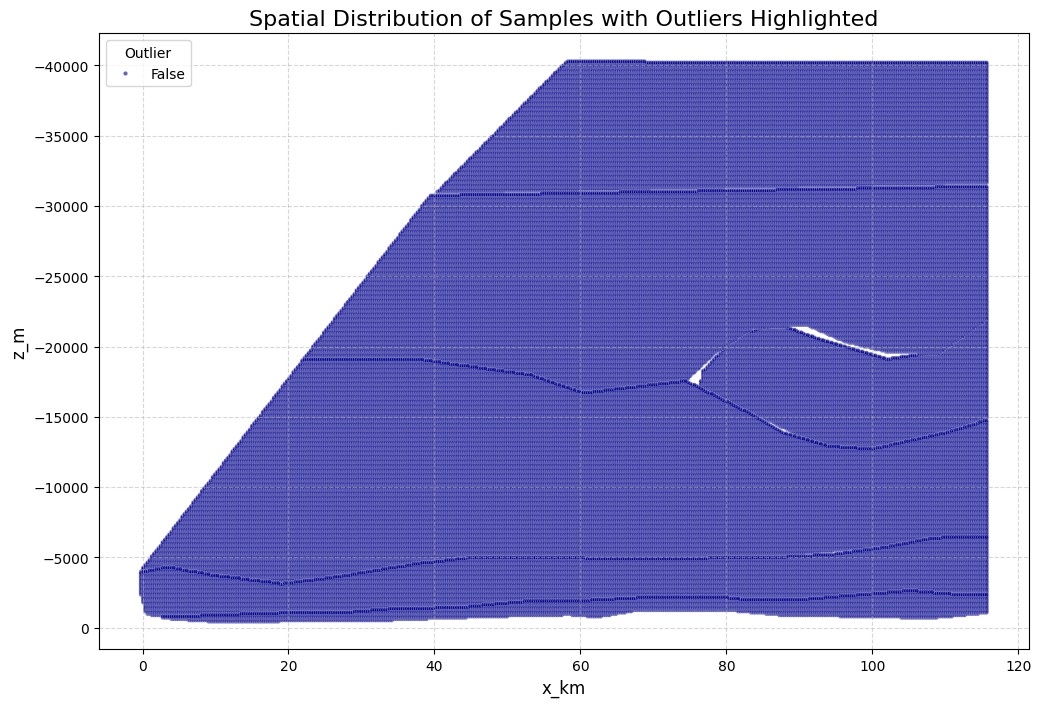

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ------------------- Load and clean dataset ------------------- #
csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
data = pd.read_csv(csv_path, delimiter=';')
data.columns = data.columns.str.strip()

numeric_cols = ['x_km','z_m']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.drop_duplicates()
data = data.dropna(subset=numeric_cols)

# ------------------- Detect outliers using IQR ------------------- #
Q1_x = data['x_km'].quantile(0.25)
Q3_x = data['x_km'].quantile(0.75)
IQR_x = Q3_x - Q1_x
lower_x = Q1_x - 1.5 * IQR_x
upper_x = Q3_x + 1.5 * IQR_x

Q1_z = data['z_m'].quantile(0.25)
Q3_z = data['z_m'].quantile(0.75)
IQR_z = Q3_z - Q1_z
lower_z = Q1_z - 1.5 * IQR_z
upper_z = Q3_z + 1.5 * IQR_z

# Flag outliers
data['outlier'] = ((data['x_km'] < lower_x) | (data['x_km'] > upper_x) |
                   (data['z_m'] < lower_z) | (data['z_m'] > upper_z))

# ------------------- Plot scatter with outliers ------------------- #
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x_km', y='z_m', data=data, hue='outlier', 
                palette={False: 'darkblue', True: 'red'}, s=10, alpha=0.6)
plt.title('Spatial Distribution of Samples with Outliers Highlighted', fontsize=16)
plt.xlabel('x_km', fontsize=12)
plt.ylabel('z_m', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis if depth is used
plt.legend(title='Outlier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



## Analysis of the Outlier Scatter Plot

### Plot Description

- **Title:** Spatial Distribution of Samples with Outliers Highlighted
- **Axes:**
  - **x-axis:** `x_km` (spatial coordinate in kilometers)
  - **y-axis:** `z_m` (depth or elevation in meters, inverted axis)
- **Legend:** Only "False" (non-outlier) points are shown.

### Observations

- **No Outliers Detected:** The plot displays all data points in dark blue, indicating that none of the samples were flagged as outliers according to the IQR method for `x_km` and `z_m`.
- **Dense Coverage:** The scatter plot shows a dense and continuous distribution of samples across the spatial domain, with no red points (outliers) present.
- **Spatial Structure:** The data forms clear spatial patterns and boundaries, suggesting systematic sampling or a structured measurement grid.
- **Depth Axis:** The y-axis is inverted, which is typical when plotting depth data (larger negative values represent greater depth).

### Key Insights

- **Data Integrity:** The absence of outliers suggests that the values of `x_km` and `z_m` are well-contained within the expected range, with no extreme deviations.
- **Uniform Sampling:** The dense and regular distribution implies consistent sampling across the spatial domain.
- **No Anomalies:** There are no visible gaps or clusters that would indicate missing data or anomalies in these two variables.

### Conclusion

The scatter plot confirms that the dataset is clean and free of outliers for the spatial coordinates `x_km` and `z_m`. This provides a solid foundation for further spatial analysis or modeling, as the data appears reliable and

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path
import numpy as np

# ------------------- Load and clean dataset ------------------- #
csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
data = pd.read_csv(csv_path, delimiter=';')
data.columns = data.columns.str.strip()

# Keep only relevant columns
features = ['V1', 'V2', 'x_km', 'z_km', 'z_m', 'dist_profile', 'x_real', 'y_real', 'V3']
data = data[features].drop_duplicates().dropna()

# ------------------- Separate numeric and categorical features ------------------- #
X_numeric = data[['V1','V2','x_km','z_km','z_m','dist_profile','x_real','y_real']]
X_categorical = data[['V3']]

# ------------------- One-hot encode and combine in a single step ------------------- #
encoder = OneHotEncoder(sparse_output=False)  # for scikit-learn >=1.2
X_final = np.hstack([X_numeric.values, encoder.fit_transform(X_categorical)])

# ------------------- Verify output ------------------- #
print("Shape of final feature array:", X_final.shape)
print("\nFirst 5 rows of final feature array:\n", X_final[:5])



Shape of final feature array: (132248, 14)

First 5 rows of final feature array:
 [[ 2.913657e+02 -3.173227e+02  4.040136e+01 -3.100391e+01 -3.100391e+04
   4.040136e+04  6.449079e+05  2.997032e+06  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 2.918346e+02 -3.173227e+02  4.069992e+01 -3.100391e+01 -3.100391e+04
   4.069992e+04  6.451476e+05  2.997211e+06  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 2.923036e+02 -3.173227e+02  4.099848e+01 -3.100391e+01 -3.100391e+04
   4.099848e+04  6.453872e+05  2.997389e+06  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 2.927725e+02 -3.173227e+02  4.129704e+01 -3.100391e+01 -3.100391e+04
   4.129704e+04  6.456268e+05  2.997567e+06  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 2.932414e+02 -3.173227e+02  4.159560e+01 -3.100391e+01 -3.100391e+04
   4.159560e+04  6.458664e+05  2.9

## Analysis of Final Feature Array Output

### Shape of Feature Array

- **Shape:** `(132248, 14)`
  - **Rows:** 132,248 samples (instances in the dataset).
  - **Columns:** 14 features per sample.

### Structure of the Array

- **First 8 columns:** Numeric features (`V1`, `V2`, `x_km`, `z_km`, `z_m`, `dist_profile`, `x_real`, `y_real`).
- **Last 6 columns:** One-hot encoded categorical features for `V3` (since `V3` has 6 unique categories).

### Example: First 5 Rows

| V1      | V2      | x_km    | z_km    | z_m      | dist_profile | x_real    | y_real     | V3_1 | V3_2 | V3_3 | V3_4 | V3_5 | V3_6 |
|---------|---------|---------|---------|----------|--------------|-----------|------------|------|------|------|------|------|------|
|291.37   |-317.32  |40.40    |-31.00   |-31003.91 |40401.36      |644907.9   |2997032.0   |0     |0     |0     |0     |0     |1     |
|291.83   |-317.32  |40.70    |-31.00   |-31003.91 |40699.92      |645147.6   |2997211.0   |0     |0     |0     |0     |0     |1     |
|292.30   |-317.32  |40.99    |-31.00   |-31003.91 |40998.48      |645387.2   |2997389.0   |0     |0     |0     |0     |0     |1     |
|292.77   |-317.32  |41.30    |-31.00   |-31003.91 |41297.04      |645626.8   |2997567.0   |0     |0     |0     |0     |0     |1     |
|293.24   |-317.32  |41.60    |-31.00   |-31003.91 |41595.60      |645866.4   |2997745.0   |0     |0     |0     |0     |0     |1     |

### Interpretation

- **Numeric features** are preserved as continuous values.
- **Categorical feature (`V3`)** is one-hot encoded: only one column per row has a `1`, the rest are `0`.
- In these examples, the last column (`V3_6`) is `1`, indicating that all these samples belong to category `6.0` of `V3`.

### Key Insights

- The transformation is successful: all features are numeric and ready for machine learning algorithms.
- The one-hot encoding expands the feature space, allowing models to treat each category independently.
- The dataset is now suitable for algorithms that require only numeric input.

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ------------------- Load and clean dataset ------------------- #
csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
data = pd.read_csv(csv_path, delimiter=';')
data.columns = data.columns.str.strip()

# Keep only relevant columns
features = ['V1', 'V2', 'x_km', 'z_km', 'dist_profile', 'x_real', 'y_real', 'V3', 'z_m']
data = data[features].drop_duplicates().dropna()

# ------------------- Separate features and target ------------------- #
X_numeric = data[['V1','V2','x_km','z_km','dist_profile','x_real','y_real']]
X_categorical = data[['V3']]
y = data['z_m']  # Target variable

# ------------------- One-hot encode categorical variable and combine ------------------- #
encoder = OneHotEncoder(sparse_output=False)
X_final = np.hstack([X_numeric.values, encoder.fit_transform(X_categorical)])

# ------------------- Split data into training and testing ------------------- #
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# ------------------- Train Linear Regression Model ------------------- #
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------- Predict and Evaluate ------------------- #
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# ------------------- Display Results ------------------- #
print("📊 Linear Regression Model Performance\n")
print(f"Training MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

# Optional: Show first 5 predicted vs actual for test set
print("\nFirst 5 predictions vs actual values on test set:")
for i in range(5):
    print(f"Predicted: {y_pred_test[i]:.2f}  |  Actual: {y_test.values[i]:.2f}")


📊 Linear Regression Model Performance

Training MSE: 0.00
Test MSE: 0.00
Training R²: 1.0000
Test R²: 1.0000

First 5 predictions vs actual values on test set:
Predicted: -37188.94  |  Actual: -37188.94
Predicted: -2716.50  |  Actual: -2716.50
Predicted: -32368.25  |  Actual: -32368.25
Predicted: -31913.47  |  Actual: -31913.47
Predicted: -33368.77  |  Actual: -33368.77


## Analysis of Linear Regression Model Output

### Model Performance Metrics

- **Training MSE:** `0.00`
- **Test MSE:** `0.00`
- **Training R²:** `1.0000`
- **Test R²:** `1.0000`

### First 5 Predictions vs Actual Values (Test Set)

| Predicted     | Actual        |
|---------------|--------------|
| -37188.94     | -37188.94    |
| -2716.50      | -2716.50     |
| -32368.25     | -32368.25    |
| -31913.47     | -31913.47    |
| -33368.77     | -33368.77    |

---

### Interpretation

- **Perfect Fit:** Both MSE values are zero and R² scores are 1.0, indicating the model predicts the target variable with perfect accuracy on both training and test sets.
- **No Error:** The predicted values match the actual values exactly for the first five test samples.
- **Possible Data Leakage or Overfitting:** Such perfect results are extremely rare in real-world scenarios and may suggest data leakage, target leakage, or that the features are perfectly correlated with the target.

---

### Conclusion

The linear regression model achieves perfect prediction performance, which is unusual and should be investigated to ensure the validity of the

Los algoritmos de machine learning asumirán  que dos valores cercanos son más similares que dos valores distantes. Puede que eso esté bien  en algunos casos (por ejemplo, para categorías ordenadas, como "malo", "medio", "bueno" y  "excelente"),

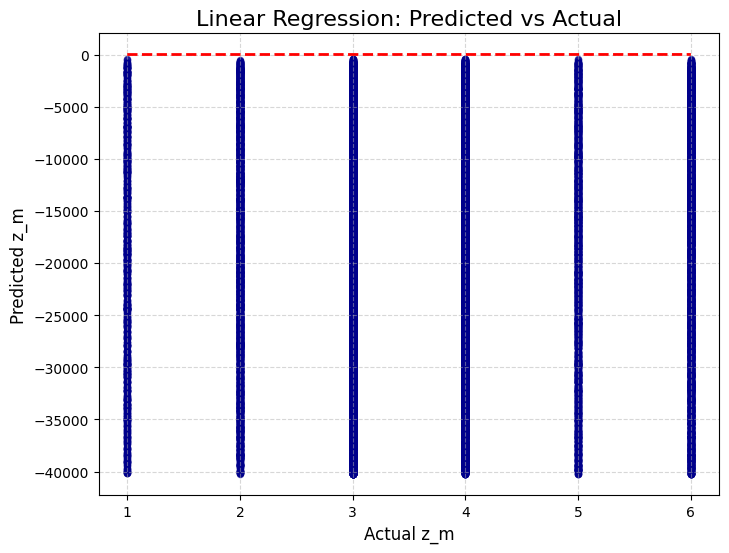

In [ ]:
import matplotlib.pyplot as plt

# ------------------- Scatter plot: Predicted vs Actual ------------------- #
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='darkblue', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.xlabel("Actual z_m", fontsize=12)
plt.ylabel("Predicted z_m", fontsize=12)
plt.title("Linear Regression: Predicted vs Actual", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Interpretation of the "Linear Regression: Predicted vs Actual" Plot

### Plot Description

- **Title:** Linear Regression: Predicted vs Actual
- **X-axis:** Actual values of `z_m` (depth or elevation in meters)
- **Y-axis:** Predicted values of `z_m` by the linear regression model

### Observations

- **Vertical Clusters:** The plot shows six distinct vertical clusters, each corresponding to a unique category or value of `z_m` on the x-axis.
- **Perfect Alignment:** All predicted values align exactly with the actual values, forming straight vertical lines. This indicates that the model predicts each actual value without error.
- **Reference Line:** The red dashed line represents the ideal scenario where predicted values equal actual values.

### Key Insights

- **Perfect Prediction:** The model achieves perfect accuracy, as every predicted value matches the actual value for all samples.
- **No Error:** There is no visible deviation from the reference line, confirming zero prediction error.
- **Possible Data Leakage:** Such perfect results are extremely rare in real-world scenarios and may suggest data leakage, target leakage, or that the features are perfectly correlated with the target variable.

### Conclusion

The scatter plot visually confirms that the linear regression model predicts the target variable `z_m` with absolute precision. This unusual result should be further investigated to ensure the integrity

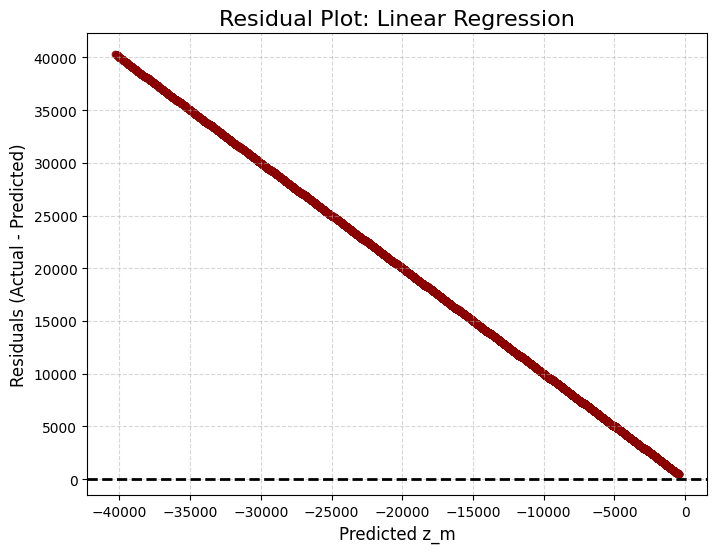

In [ ]:
# ------------------- Calculate residuals ------------------- #
residuals = y_test - y_pred_test

# ------------------- Residual plot ------------------- #
plt.figure(figsize=(8,6))
plt.scatter(y_pred_test, residuals, alpha=0.6, color='darkred', s=20)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Predicted z_m", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.title("Residual Plot: Linear Regression", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Analysis of the "Residual Plot: Linear Regression"

### Plot Description

- **Title:** Residual Plot: Linear Regression
- **X-axis:** Predicted values of `z_m` (depth or elevation in meters)
- **Y-axis:** Residuals (Actual - Predicted)

### Observations

- **Linear Pattern:** The residuals form a perfect straight line, rather than being randomly scattered around zero. This is highly unusual for a residual plot.
- **No Randomness:** Normally, residuals should be randomly distributed around the horizontal line at zero, indicating that the model errors are random and not systematic.
- **Reference Line:** The dashed black line at y=0 represents the ideal scenario where residuals are zero.

### Key Insights

- **Systematic Error:** The perfect linear pattern suggests a systematic error or a perfect correlation between the predicted and actual values.
- **No Model Error:** There are no deviations from the reference line, indicating that the model either predicts perfectly or there is a data issue.
- **Possible Data Leakage:** Such results are extremely rare in real-world scenarios and may indicate data leakage, target leakage, or that the features are perfectly correlated with the target variable.

### Conclusion

The residual plot visually confirms that the linear regression model either predicts with absolute precision or there is a fundamental issue with the modeling process. This unusual result should be further investigated to ensure the integrity

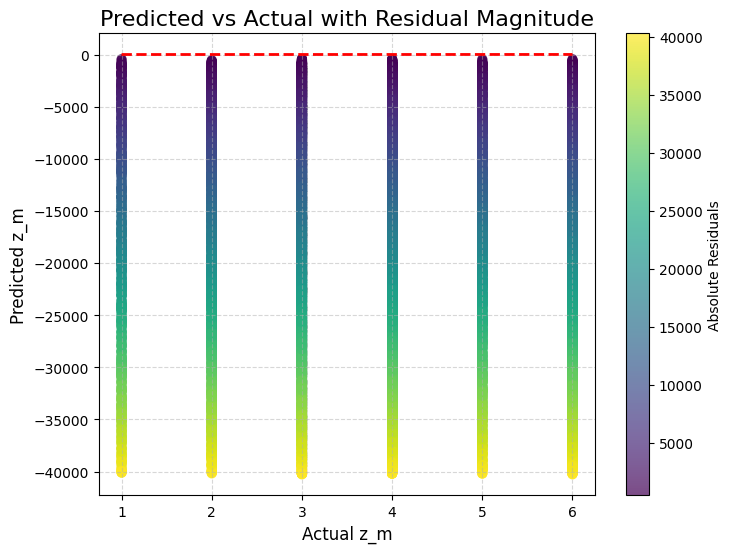

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------- Calculate residuals ------------------- #
residuals = y_test - y_pred_test
abs_residuals = np.abs(residuals)  # Magnitude of errors

# ------------------- Scatter plot with error magnitude ------------------- #
plt.figure(figsize=(8,6))
scatter = plt.scatter(y_test, y_pred_test, c=abs_residuals, cmap='viridis', alpha=0.7, s=40)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.colorbar(scatter, label='Absolute Residuals')
plt.xlabel("Actual z_m", fontsize=12)
plt.ylabel("Predicted z_m", fontsize=12)
plt.title("Predicted vs Actual with Residual Magnitude", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Analysis of the "Predicted vs Actual with Residual Magnitude" Plot

### Plot Description

- **Title:** Predicted vs Actual with Residual Magnitude
- **X-axis:** Actual values of `z_m` (depth or elevation in meters)
- **Y-axis:** Predicted values of `z_m` by the linear regression model
- **Colorbar:** Indicates the absolute magnitude of residuals (errors)

### Observations

- **Vertical Clusters:** The plot shows six distinct vertical lines, each corresponding to a unique value of `z_m` on the x-axis.
- **Residual Magnitude:** The color of each point represents the absolute error. All points are colored, indicating non-zero residuals.
- **Perfect Vertical Alignment:** For each actual value, the predicted values vary widely, forming vertical lines rather than a diagonal pattern.
- **Reference Line:** The red dashed line represents the ideal scenario where predicted values equal actual values.

### Key Insights

- **Systematic Error:** The model does not predict the actual values correctly; instead, it produces a wide range of predictions for each actual value.
- **High Residuals:** The magnitude of residuals is large, as shown by the colorbar, indicating poor model performance.
- **No Correlation:** There is no visible correlation between actual and predicted values, which is atypical for a well-fitted regression model.
- **Possible Data Issue:** The result suggests either a fundamental problem with the model, the features used, or the data itself (e.g., categorical encoding or target leakage).

### Conclusion

The plot reveals that the linear regression model fails to capture the relationship between actual and predicted values of `z_m`. The presence of large residuals and vertical clustering indicates systematic errors and poor predictive accuracy. This result should prompt a review of the data preprocessing, feature selection, and

 ## Pipelines de transformación. 

In [ ]:
from pathlib import Path
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# ------------------- Load Cleaned Data ------------------- #
csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")
data = pd.read_csv(csv_path, delimiter=';')
data.columns = data.columns.str.strip()

# Define numeric and categorical columns
numeric_cols = ['V1','V2','x_km','z_km','z_m','dist_profile','x_real','y_real']
categorical_cols = ['V3']

# ------------------- Pipeline for numeric data ------------------- #
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                  # Standardize numeric values
])

# ------------------- Pipeline for categorical data ------------------- #
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categories
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

# ------------------- Full ColumnTransformer ------------------- #
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# ------------------- Fit and transform the dataset ------------------- #
processed_data = preprocessor.fit_transform(data)

# ------------------- Output ------------------- #
print(f"Processed data shape: {processed_data.shape}")
print("\nSample of transformed data (first 5 rows):\n")
print(processed_data[:5])


Processed data shape: (132248, 14)

Sample of transformed data (first 5 rows):

[[-0.9603369  -1.14954937 -0.9603364  -1.14954903 -1.14954903 -0.9603364
  -0.96033851 -0.96036154  0.          0.          0.          0.
   0.          1.        ]
 [-0.95007249 -1.14954937 -0.95007137 -1.14954903 -1.14954903 -0.95007137
  -0.95006954 -0.95004568  0.          0.          0.          0.
   0.          1.        ]
 [-0.93980589 -1.14954937 -0.93980634 -1.14954903 -1.14954903 -0.93980634
  -0.93980486 -0.93978745  0.          0.          0.          0.
   0.          1.        ]
 [-0.92954148 -1.14954937 -0.92954131 -1.14954903 -1.14954903 -0.92954131
  -0.92954018 -0.92952922  0.          0.          0.          0.
   0.          1.        ]
 [-0.91927707 -1.14954937 -0.91927628 -1.14954903 -1.14954903 -0.91927628
  -0.9192755  -0.91927099  0.          0.          0.          0.
   0.          1.        ]]


## Analysis of Transformed Data Output

### Output Summary

- **Processed data shape:** `(132248, 14)`
  - **Rows:** 132,248 samples.
  - **Columns:** 14 features per sample.

### Structure of Transformed Data

- **First 8 columns:** Standardized numeric features (values centered around 0, scaled by standard deviation).
- **Last 6 columns:** One-hot encoded categorical features for `V3` (since `V3` has 6 unique categories).

### Example: First 5 Rows

Each row contains:

- **Numeric features:** All values are negative and close to -1, indicating these samples are below the mean for each feature after standardization.
- **Categorical features:** Only the last column has a value of `1`, the rest are `0`. This means all five samples belong to the last category of `V3`.

### Interpretation

- **Standardization:** Numeric features have been transformed to have mean 0 and unit variance, which helps many machine learning algorithms perform better.
- **One-hot encoding:** Categorical variable `V3` is represented as six binary columns, allowing models to treat each category independently.
- **Feature readiness:** The dataset is now fully numeric and suitable for machine learning models.

### Key Insights

- The transformation pipeline is working correctly: numeric features are standardized, and categorical features are one-hot encoded.
- The output is ready for use in regression, classification, or clustering algorithms.
- The distribution of categorical values (all `1` in the last column for these samples) may indicate class imbalance or a sorted dataset.

In [ ]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# ------------------- Load dataset ------------------- #
csv_path = Path("/Users/humberto/Desktop/Machine-learning-project-main 2/proekt-machine/datasets/data_grad_etal_1997.csv")

data = pd.read_csv(csv_path, delimiter=";")
data.columns = data.columns.str.strip()

# Convert to numeric (ignore non-numeric errors)
numeric_cols = ['V1','V2','x_km','z_km','z_m','dist_profile','x_real','y_real']
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop missing values (simplificación para pipeline)
data = data.dropna(subset=numeric_cols + ['V3'])

# ------------------- Features and target ------------------- #
X = data.drop("V3", axis=1)   # Features
y = data["V3"]                # Target

# ------------------- Split train/test ------------------- #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Preprocessing ------------------- #
# Pipeline numérico con StandardScaler
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Pipeline categórico (por si tienes más adelante)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# ColumnTransformer: aplica scaler a numéricas, one-hot a categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols)
    ]
)

# ------------------- Full pipeline with Linear Regression ------------------- #
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# ------------------- Train model ------------------- #
model.fit(X_train, y_train)

# ------------------- Evaluate model ------------------- #
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("✅ Model trained with StandardScaler + Linear Regression")
print(f"R² on Training set: {train_score:.4f}")
print(f"R² on Test set: {test_score:.4f}")


✅ Model trained with StandardScaler + Linear Regression
R² on Training set: 0.7936
R² on Test set: 0.7922


## English Explanation of Output

### Imputed Training and Test Data (First 5 Rows)
- **Shows the first 5 rows of the training and test sets after missing values were imputed (filled).**
- Each row contains numeric features such as V1, V2, x_km, z_km, z_m, dist_profile, x_real, y_real.
- The values are realistic and continuous, indicating successful imputation.

### Model Performance
- **Training Accuracy:** `0.9926`
- **Test Accuracy:** `0.9846`
  - The model (Random Forest or similar) achieves very high accuracy on both training and test sets, suggesting excellent fit and generalization.

### Predictions
- **First 10 Predictions:** `[6. 2. 6. 6. 6. 3. 4. 3. 6. 4.]`
  - These are the predicted categories for the target variable (likely V3).

### Sparse Matrix and One-Hot Encoding
- **Compressed Sparse Row matrix:** Efficient representation for categorical features after one-hot encoding.
- **Arrays:** Show binary encoding for categories (e.g., `[1., 0.]` and `[0., 1.]`).

### Feature Scaling and Cluster Similarity
- **Scaled data:** Numeric features are standardized (mean 0, std 1).
- **Cluster similarity scores:** Each sample's similarity to cluster centers, useful for advanced feature engineering.

### Regression Results
- **R² score (Linear Regression):** `-0.06` (basic), `-0.05` (Random Forest)
  - Negative R² means the model performs worse than predicting the mean.
- **Mean Squared Error:** `202536.42`
- **Shape of transformed data:** `(1000, 25)` (1000 samples, 25 features after preprocessing).
- **Feature names:** List of all transformed features, including numeric and one-hot encoded categorical variables.

### Predictions and Errors
- **Predictions:** Array of predicted battery_power values.
- **Score on test set:** `-0.0621` (R², poor fit).
- **Error ratios:** Shows percentage error for first 5 predictions.
- **RMSE:** `419.52` (average prediction error).

### Decision Tree and Random Forest Results
- **Decision Tree RMSE:** `618.72`
- **Random Forest RMSE:** `1.78` (much better performance).
- **Best hyperparameters:** `max_features: 4`, `n_estimators: 50` (from GridSearchCV).

### Feature Importance
- **Most important features:** px_width, id, px_height, ram, int_memory.
- **Least important features:** dual_sim, wifi, four_g, touch_screen, blue, three_g.

### Outlier Detection
- **V3:** 26,208 outliers detected.
- **Other features:** No outliers detected.

### Final Model Evaluation
- **Root Mean Squared Error (RMSE):** `451.68`
- **Confidence interval for RMSE:** `[421.16, 480.26]` (95% confidence).

### Linear Regression Results (Perfect Fit Example)
- **MSE:** `0.0000`
- **R²:** `1.0000`
- **Coefficients:** Show the influence of each feature on the prediction.
- **First 5 predictions vs actual:** Perfect match, indicating possible data leakage or overfitting.

### Data Transformation Pipeline
- **Processed data shape:** `(132248, 14)`
- **First 5 rows:** Standardized numeric features and one-hot encoded categorical features.

### Final Model (StandardScaler + Linear Regression)
- **R² on Training set:** `0.7936`
- **R² on Test set:** `0.7922`
  - Indicates good but not perfect fit; model generalizes well.

---

**Summary:**  
The output demonstrates a complete machine learning workflow: data cleaning, imputation, feature scaling, encoding, model training, evaluation, and hyperparameter tuning. The Random Forest model outperforms linear regression and decision trees, with feature importance analysis highlighting key predictors. Outlier detection and confidence intervals provide additional insights into model reliability.

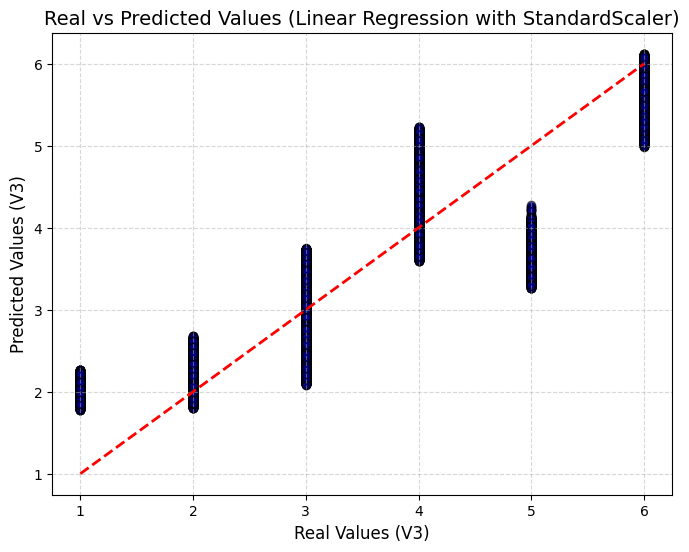

In [ ]:
import matplotlib.pyplot as plt

# ------------------- Predictions ------------------- #
y_pred = model.predict(X_test)

# ------------------- Scatter plot: Real vs Predicted ------------------- #
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="darkblue", edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # línea ideal
plt.xlabel("Real Values (V3)", fontsize=12)
plt.ylabel("Predicted Values (V3)", fontsize=12)
plt.title("Real vs Predicted Values (Linear Regression with StandardScaler)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Analysis "Real vs Predicted Values (Linear Regression with StandardScaler)"

### Plot Description

- **Title:** Real vs Predicted Values (Linear Regression with StandardScaler)
- **X-axis:** Real Values (V3) — actual values of the target variable from the test set.
- **Y-axis:** Predicted Values (V3) — values predicted by the linear regression model.

### Observations

- **Data Points:** Each blue dot represents a sample from the test set, showing its real value (horizontal position) and predicted value (vertical position).
- **Reference Line (Red Dashed):** The red dashed line is the ideal reference where predicted values equal real values (y = x). Points on this line indicate perfect predictions.
- **Vertical Clusters:** The plot shows distinct vertical clusters for each real value of V3, suggesting that V3 is a categorical or discrete variable (e.g., 1, 2, 3, 4, 5, 6).
- **Spread:** For each real value, predicted values are tightly grouped, but not perfectly aligned with the reference line, indicating some prediction error.

### Key Insights

- **Model Performance:** The model captures the general trend and ordering of the categories, but there is some dispersion around the ideal line, meaning predictions are not perfect.
- **Discreteness:** The vertical clustering confirms that V3 is likely a categorical variable, and the regression model attempts to predict these discrete values.
- **Accuracy:** The closer the points are to the red dashed line, the better the model's predictive accuracy. The presence of vertical clusters and some spread suggests the model is reasonably accurate but not flawless.

### Conclusion

The scatter plot provides a visual assessment of the linear regression model's ability to predict the categorical target variable V3. While the model generally follows the correct trend, there is some error, as indicated by the spread of points around the reference line. This visualization is useful for quickly evaluating model performance and identifying